In [1348]:
# Getting data from internet
import pandas as pd
import requests
import json
import time
import import_ipynb
import matplotlib.pyplot as plt
%run 'functions.ipynb'

In [1349]:
# Import data from csv /Users/jeanstibel/Documents/AI Classes/Projects/project_01/data_exported/dt_50_YM.csv
data_df = pd.read_csv('//Users/jeanstibel/Documents/AI Classes/Projects/project_01/data_exported/dt_50_YM.csv')
data_df.head()

,date_month,crypto_id,id_name,open,close,diff_oc,mean_oc,high,low,diff_hl,mean_hl,volume,number_of_trades
0,2017-08,BTC,Bitcoin,4261.48,4724.89,463.41,4493.185,4745.42,3400.00,1345.42,4072.710,10015.640272,69180
1,2017-08,ETH,Ethereum,301.13,384.79,83.66,342.960,393.71,144.21,249.50,268.960,82652.559710,73552
2,2017-09,BTC,Bitcoin,4724.89,4378.51,-346.38,4551.700,4939.19,2817.00,2122.19,3878.095,27634.189120,228745
3,2017-09,ETH,Ethereum,384.79,304.36,-80.43,344.575,394.39,192.00,202.39,293.195,167937.124440,177180
4,2017-10,BTC,Bitcoin,4378.49,6463.00,2084.51,5420.745,6498.01,4110.00,2388.01,5304.005,41626.388463,303389


In [1350]:
# get data type
data_df.dtypes

date_month           object
crypto_id            object
id_name              object
open                float64
close               float64
diff_oc             float64
mean_oc             float64
high                float64
low                 float64
diff_hl             float64
mean_hl             float64
volume              float64
number_of_trades      int64
dtype: object

In [1351]:
'''
# Change 'volumn' column in millions
data_df['volume'] = data_df['volume'] / 1000000

# Change columns 'open', 'close', 'diff_oc', 'mean_oc', 'high', 'low', 'diff_hl', 'mean_hl', 'volume' to 5 decimal places
columns_to_round = ['open', 'close', 'diff_oc', 'mean_oc', 'high', 'low', 'diff_hl', 'mean_hl', 'volume']
data_df[columns_to_round] = data_df[columns_to_round].round(5)

data_df
'''

"\n# Change 'volumn' column in millions\ndata_df['volume'] = data_df['volume'] / 1000000\n\n# Change columns 'open', 'close', 'diff_oc', 'mean_oc', 'high', 'low', 'diff_hl', 'mean_hl', 'volume' to 5 decimal places\ncolumns_to_round = ['open', 'close', 'diff_oc', 'mean_oc', 'high', 'low', 'diff_hl', 'mean_hl', 'volume']\ndata_df[columns_to_round] = data_df[columns_to_round].round(5)\n\ndata_df\n"

In [1352]:
## List of crypto to compare all years, 'BTC' 'ETH' 'XRP' 'BNB' 'SOL' 'DOGE' 'ADA' 'TRX' 'AVAX' 'LINK' 'SHIB', 'XLM' 'DOT'
crypto_list = ['BTC', 'ETH', 'XRP', 'BNB', 'SOL', 'DOGE', 'ADA', 'TRX', 'AVAX', 'LINK', 'SHIB', 'XLM', 'DOT']

In [1353]:
# Make sure that 'date_month' is in datetime format
data_df['date_month'] = pd.to_datetime(data_df['date_month'], format='%Y-%m')

# Convert 'date_month' to period for filtering by year
data_df['date_month'] = data_df['date_month'].dt.to_period('M')

# get data for each year from data_df
data_2017 = data_df.loc[data_df['date_month'].dt.year == 2017]
data_2018 = data_df.loc[data_df['date_month'].dt.year == 2018]
data_2019 = data_df.loc[data_df['date_month'].dt.year == 2019]
data_2020 = data_df.loc[data_df['date_month'].dt.year == 2020]
data_2021 = data_df.loc[data_df['date_month'].dt.year == 2021]
data_2022 = data_df.loc[data_df['date_month'].dt.year == 2022]
data_2023 = data_df.loc[data_df['date_month'].dt.year == 2023]
data_2024 = data_df.loc[data_df['date_month'].dt.year == 2024]

data_2018.head()

,date_month,crypto_id,id_name,open,close,diff_oc,mean_oc,high,low,diff_hl,mean_hl,volume,number_of_trades
15,2018-01,BNB,Binance Coin,8.5478,11.3131,2.7653,9.93045,25.18,7.80,17.38,16.490,7.847443e+07,1807917
16,2018-01,BTC,Bitcoin,13715.6500,10285.1000,-3430.5500,12000.37500,17176.24,9035.00,8141.24,13105.620,8.166756e+05,7214977
17,2018-01,ETH,Ethereum,733.0100,1124.8100,391.8000,928.91000,1440.00,716.80,723.20,1078.400,4.449875e+06,5243958
18,2018-01,LTC,Litecoin,223.6900,165.1900,-58.5000,194.44000,315.00,135.67,179.33,225.335,1.953438e+06,875325
19,2018-01,NEO,NEO,74.8540,146.4880,71.6340,110.67100,198.60,71.05,127.55,134.825,9.577571e+06,1580292


In [1354]:
# For all years get values only for 'crypto_list'
data_2017_list = data_2017.loc[data_2017['crypto_id'].isin(crypto_list)]
data_2018_list = data_2018.loc[data_2018['crypto_id'].isin(crypto_list)]
data_2019_list = data_2019.loc[data_2019['crypto_id'].isin(crypto_list)]
data_2020_list = data_2020.loc[data_2020['crypto_id'].isin(crypto_list)]
data_2021_list = data_2021.loc[data_2021['crypto_id'].isin(crypto_list)]
data_2022_list = data_2022.loc[data_2022['crypto_id'].isin(crypto_list)]
data_2023_list = data_2023.loc[data_2023['crypto_id'].isin(crypto_list)]
data_2024_list = data_2024.loc[data_2024['crypto_id'].isin(crypto_list)]


In [1355]:
# I create a dataframe with years for list of crypto
data_list = [data_2017_list, data_2018_list, data_2019_list, data_2020_list, data_2021_list, data_2022_list, data_2023_list, data_2024_list]
data_list_df = pd.concat(data_list)
data_list_df

# Save data_list_df to csv
data_list_df.to_csv('/Users/jeanstibel/Documents/AI Classes/Projects/01 Project/data_top_50/data_list_df.csv', index=False)


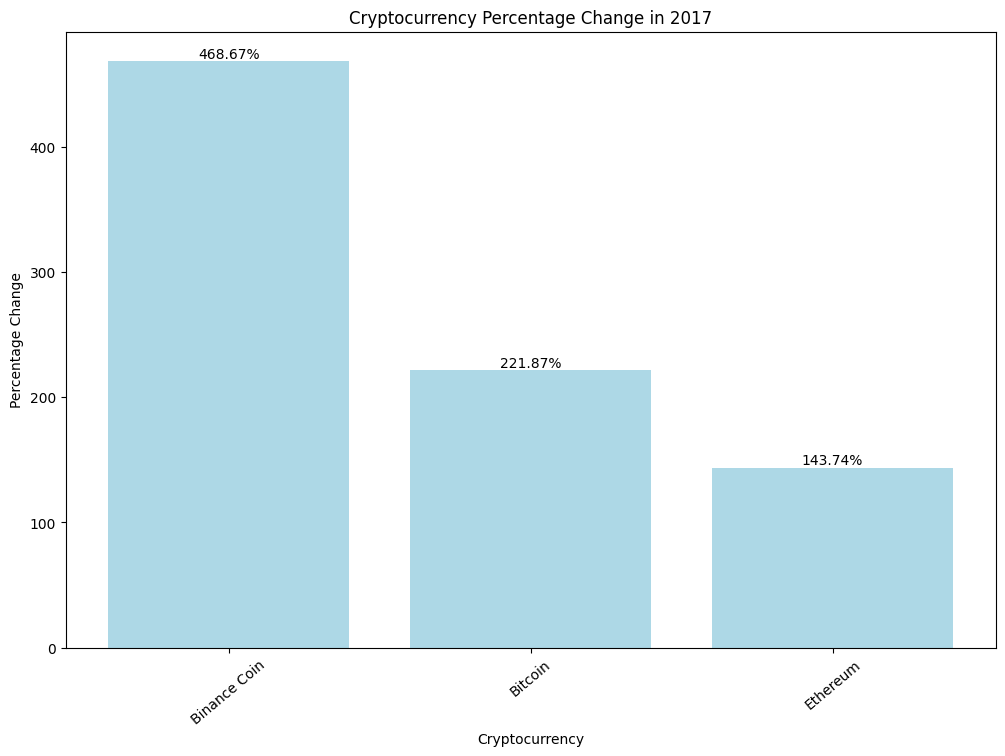

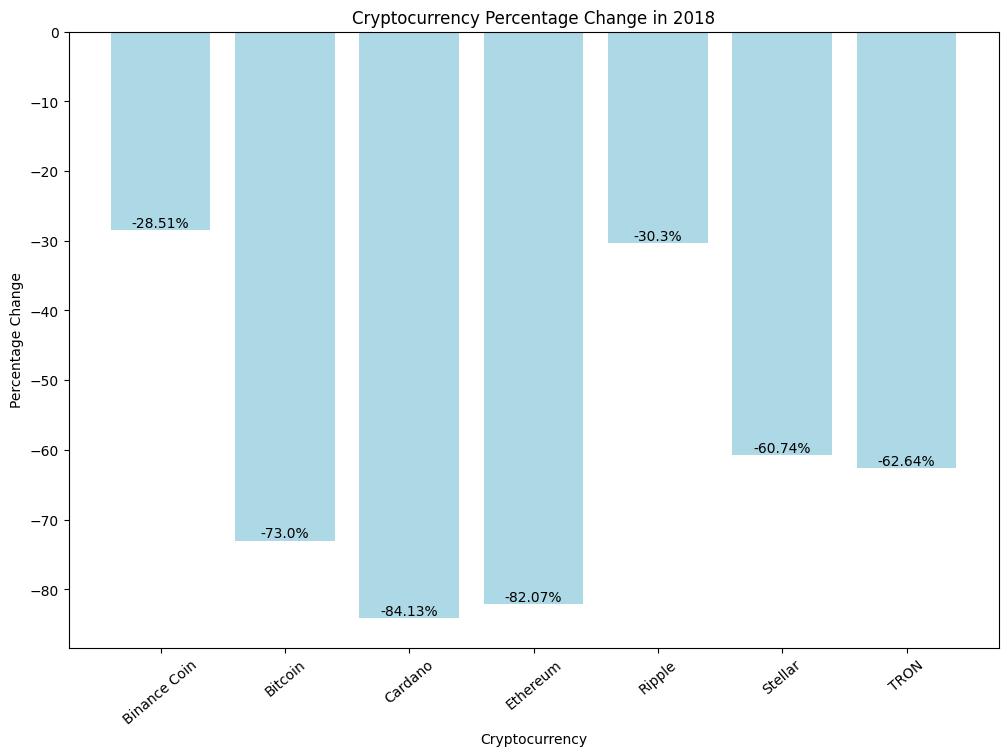

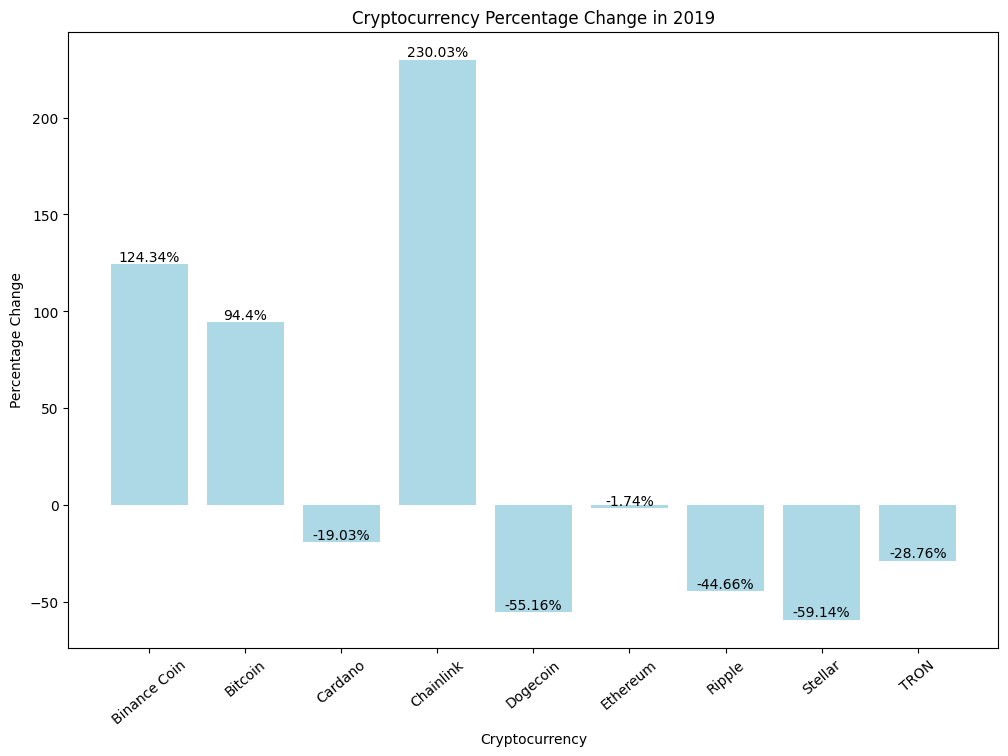

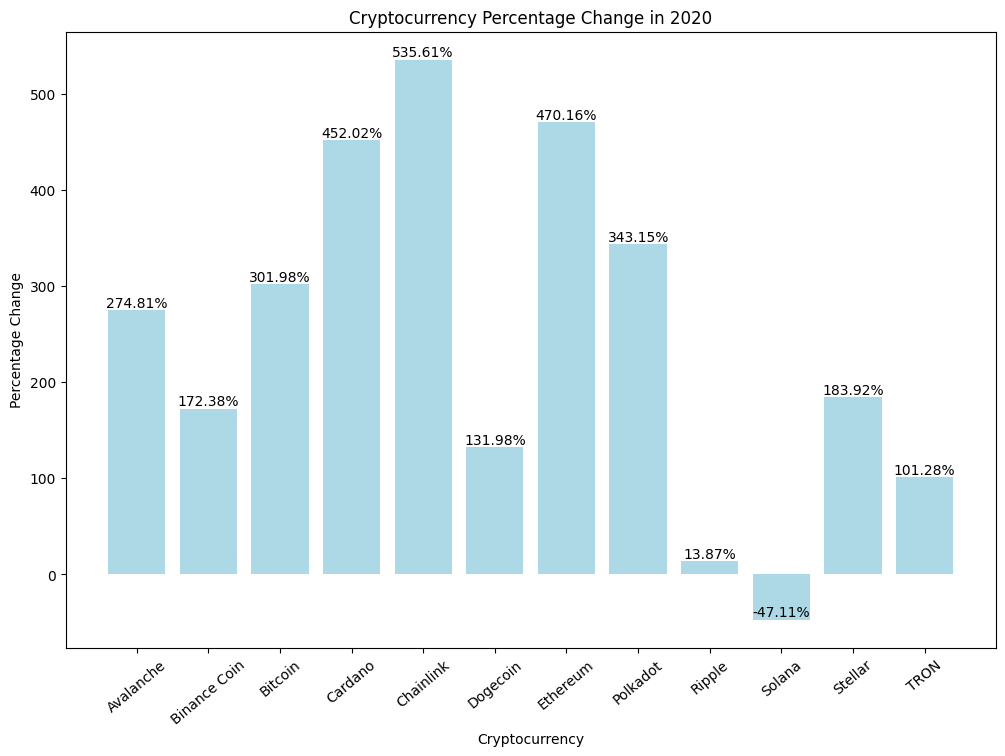

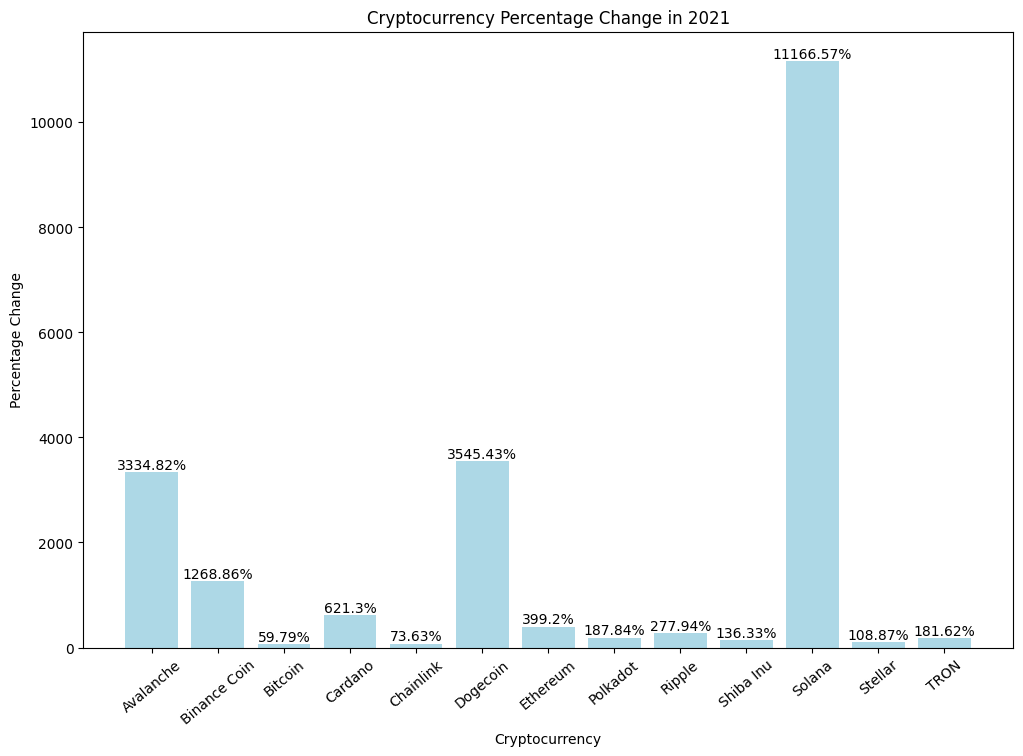

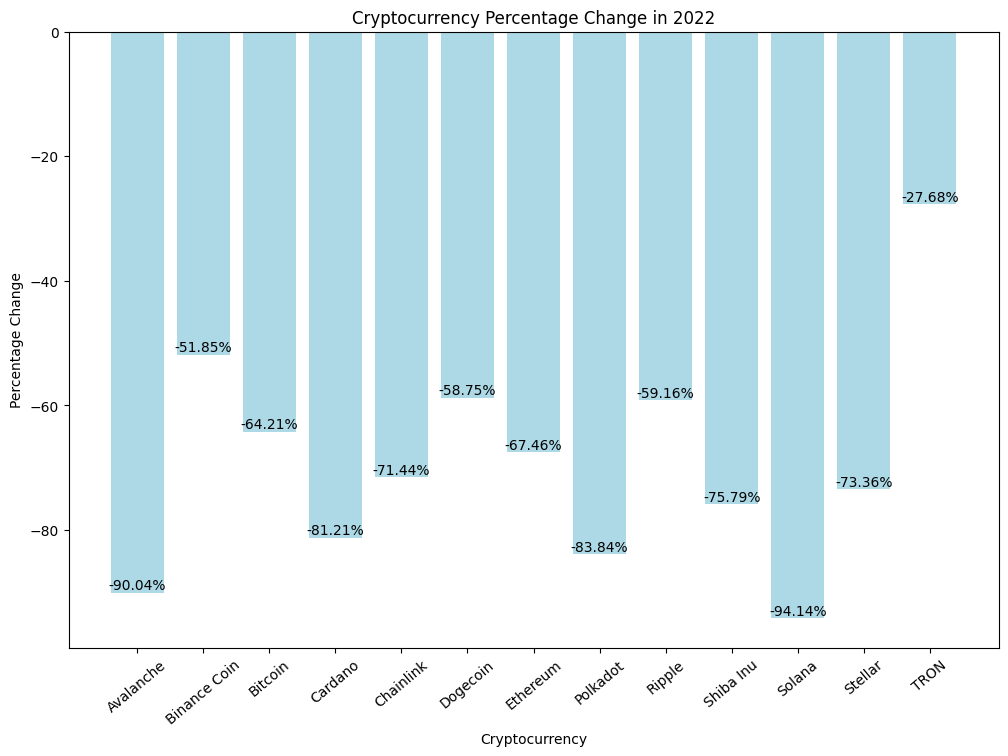

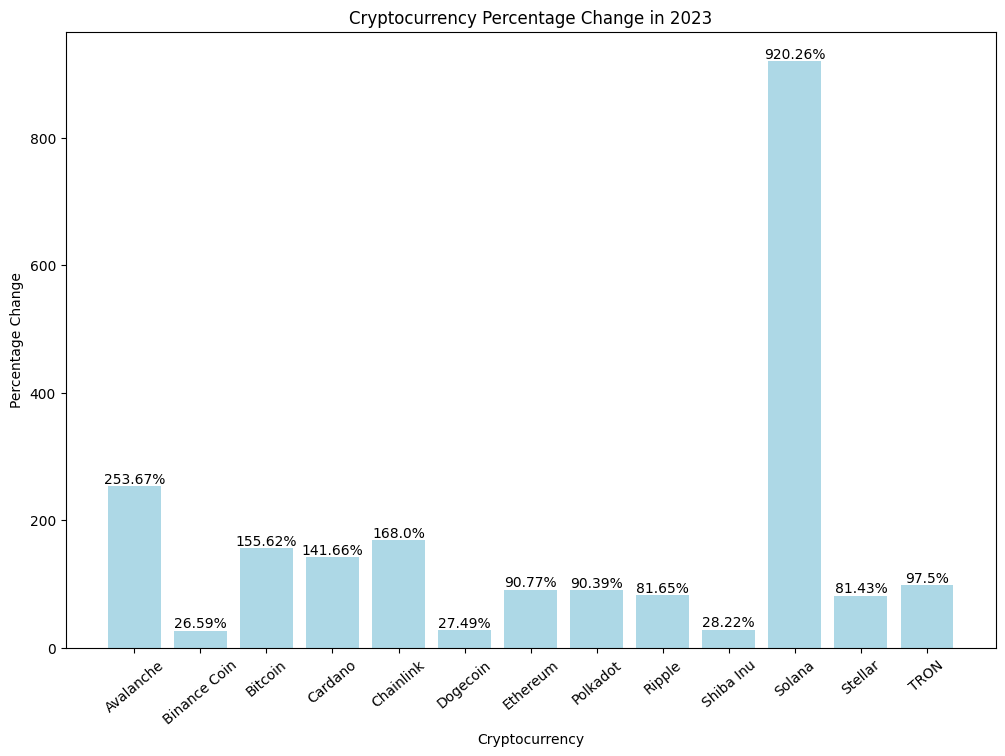

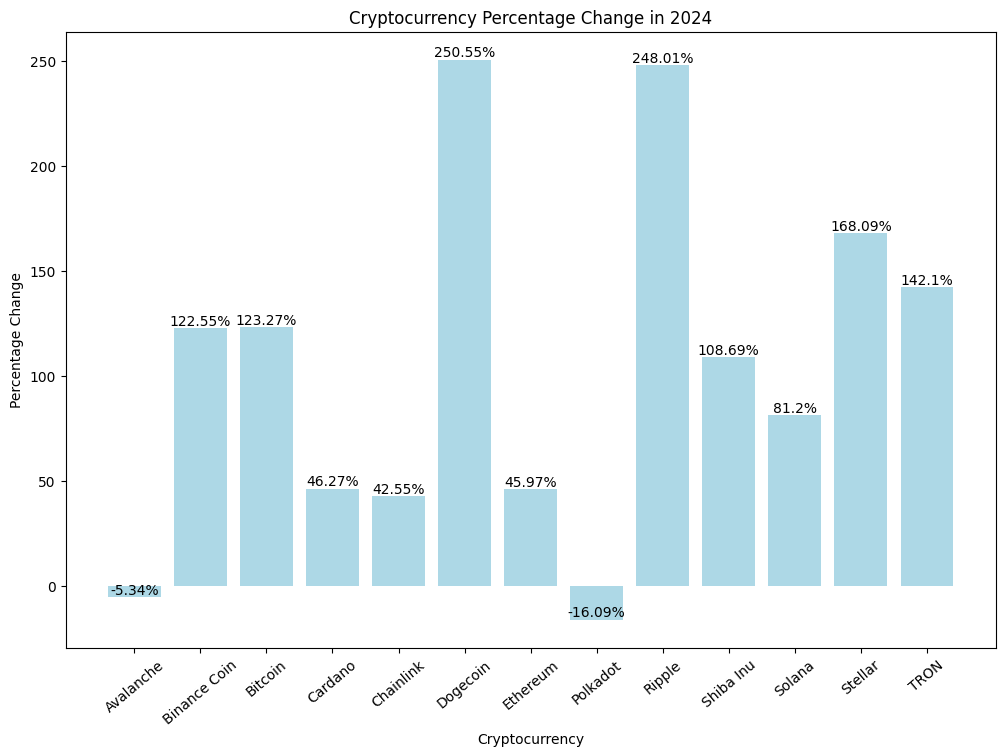

In [1356]:
# create graphs to show the percentage change for each year, how much did they change in the year
data_2017_list = calculate_percentage_change(data_2017_list)
plot_percentage_change(data_2017_list, 2017)

data_2018_list = calculate_percentage_change(data_2018_list)
plot_percentage_change(data_2018_list, 2018)

data_2019_list = calculate_percentage_change(data_2019_list)
plot_percentage_change(data_2019_list, 2019)

data_2020_list = calculate_percentage_change(data_2020_list)
plot_percentage_change(data_2020_list, 2020)

data_2021_list = calculate_percentage_change(data_2021_list)
plot_percentage_change(data_2021_list, 2021)

data_2022_list = calculate_percentage_change(data_2022_list)
plot_percentage_change(data_2022_list, 2022)

data_2023_list = calculate_percentage_change(data_2023_list)
plot_percentage_change(data_2023_list, 2023)

data_2024_list = calculate_percentage_change(data_2024_list)
plot_percentage_change(data_2024_list, 2024)



In [1357]:
# From data_list_df get column columns date_month, crypto_id, 'number_of_trades'
data_list_df_trade = data_list_df[['date_month', 'crypto_id', 'id_name', 'number_of_trades']]
data_list_df_trade.head(20)


,date_month,crypto_id,id_name,number_of_trades
0,2017-08,BTC,Bitcoin,69180
1,2017-08,ETH,Ethereum,73552
2,2017-09,BTC,Bitcoin,228745
3,2017-09,ETH,Ethereum,177180
4,2017-10,BTC,Bitcoin,303389
5,2017-10,ETH,Ethereum,214648
6,2017-11,BNB,Binance Coin,41544
7,2017-11,BTC,Bitcoin,577424
8,2017-11,ETH,Ethereum,362825
10,2017-12,BNB,Binance Coin,675039


In [1358]:
# get num_of_trades in 1000
data_list_df_trade['number_of_trades'] = (data_list_df_trade['number_of_trades'] / 1000).round(2)
data_list_df_trade

/var/folders/ts/mzxn_zz146jfqn27w1_43xz40000gn/T/ipykernel_88639/3043489408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_list_df_trade['number_of_trades'] = (data_list_df_trade['number_of_trades'] / 1000).round(2)


,date_month,crypto_id,id_name,number_of_trades
0,2017-08,BTC,Bitcoin,69.18
1,2017-08,ETH,Ethereum,73.55
2,2017-09,BTC,Bitcoin,228.74
3,2017-09,ETH,Ethereum,177.18
4,2017-10,BTC,Bitcoin,303.39
...,...,...,...,...
3278,2024-12,SHIB,Shiba Inu,199219.50
3279,2024-12,SOL,Solana,63051.11
3284,2024-12,TRX,TRON,24011.16
3287,2024-12,XLM,Stellar,12182.54


In [1359]:
'''
def plot_number_of_trades_for_year2(year, data, color_dict):
    """
    Plots the number of trades for each crypto_id and month for a given year.

    Parameters:
    year (int): The year to plot data for.
    data (DataFrame): The data to plot.
    color_dict (dict): Dictionary mapping crypto_id to colors.
    """
    data_trade = data.loc[data['date_month'].dt.year == year]
    data_trade['month'] = data_trade['date_month'].dt.strftime('%b')
    data_trade['month'] = pd.Categorical(data_trade['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
    data_trade = data_trade.groupby(['month', 'id_name'])['number_of_trades'].sum().unstack().fillna(0)
    
    ax = data_trade.plot(kind='barh', stacked=True, figsize=(10, 8), color=[color_dict.get(x, '#333333') for x in data_trade.columns])
    plt.title(f'Number of Trades for Cryptocurrencies in {year}')
    plt.xlabel('Number of Trades')
    plt.ylabel('Month')
    plt.legend(title='Cryptocurrency', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

# Example usage:
plot_number_of_trades_for_year2(2020, data_list_df_trade)
'''


'\ndef plot_number_of_trades_for_year2(year, data, color_dict):\n    """\n    Plots the number of trades for each crypto_id and month for a given year.\n\n    Parameters:\n    year (int): The year to plot data for.\n    data (DataFrame): The data to plot.\n    color_dict (dict): Dictionary mapping crypto_id to colors.\n    """\n    data_trade = data.loc[data[\'date_month\'].dt.year == year]\n    data_trade[\'month\'] = data_trade[\'date_month\'].dt.strftime(\'%b\')\n    data_trade[\'month\'] = pd.Categorical(data_trade[\'month\'], categories=[\'Jan\', \'Feb\', \'Mar\', \'Apr\', \'May\', \'Jun\', \'Jul\', \'Aug\', \'Sep\', \'Oct\', \'Nov\', \'Dec\'], ordered=True)\n    data_trade = data_trade.groupby([\'month\', \'id_name\'])[\'number_of_trades\'].sum().unstack().fillna(0)\n    \n    ax = data_trade.plot(kind=\'barh\', stacked=True, figsize=(10, 8), color=[color_dict.get(x, \'#333333\') for x in data_trade.columns])\n    plt.title(f\'Number of Trades for Cryptocurrencies in {year}\')\n 

/var/folders/ts/mzxn_zz146jfqn27w1_43xz40000gn/T/ipykernel_88639/2991268588.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trade['month'] = data_trade['date_month'].dt.strftime('%b')
/var/folders/ts/mzxn_zz146jfqn27w1_43xz40000gn/T/ipykernel_88639/2991268588.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trade['month'] = pd.Categorical(data_trade['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
/var/folders/ts/mzxn

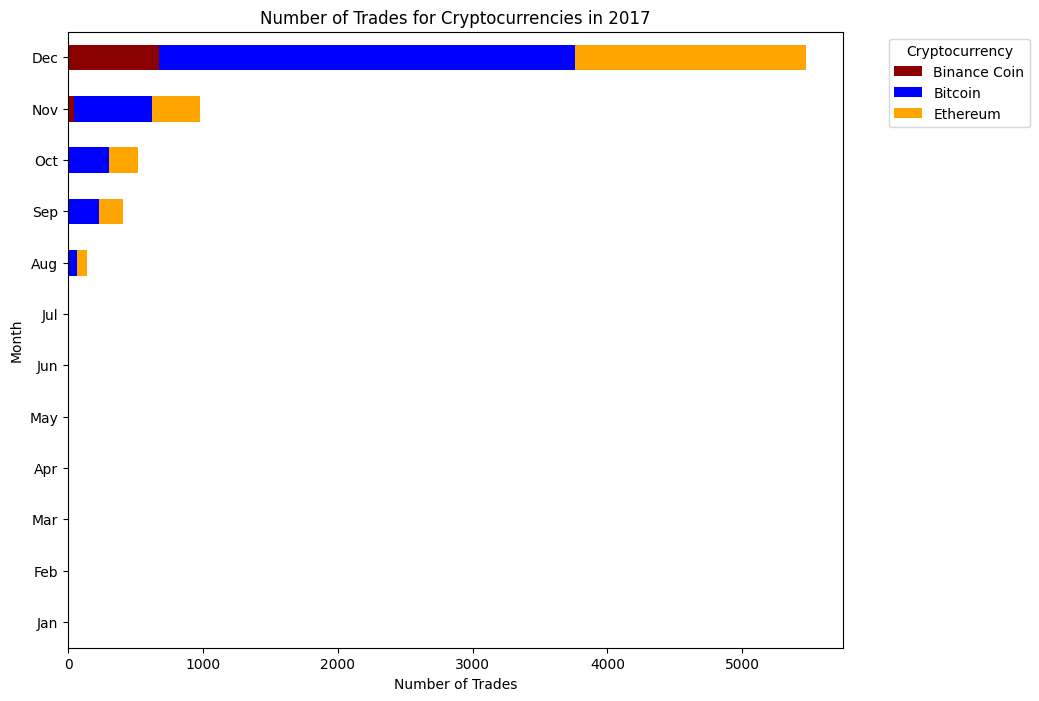

/var/folders/ts/mzxn_zz146jfqn27w1_43xz40000gn/T/ipykernel_88639/2991268588.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trade['month'] = data_trade['date_month'].dt.strftime('%b')
/var/folders/ts/mzxn_zz146jfqn27w1_43xz40000gn/T/ipykernel_88639/2991268588.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trade['month'] = pd.Categorical(data_trade['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
/var/folders/ts/mzxn

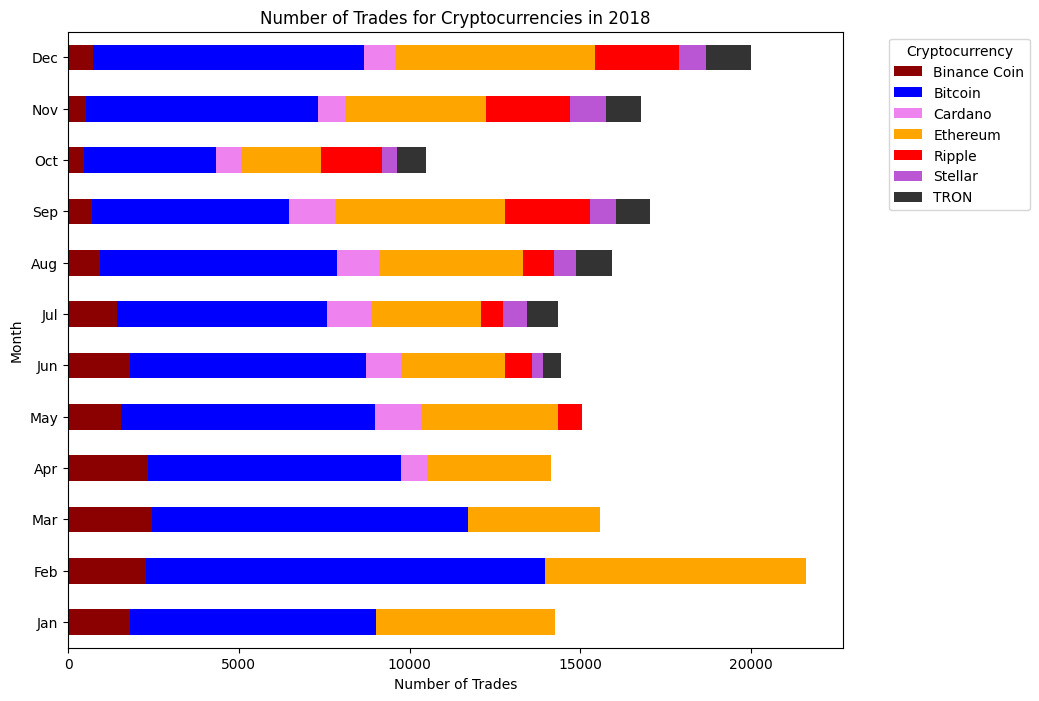

/var/folders/ts/mzxn_zz146jfqn27w1_43xz40000gn/T/ipykernel_88639/2991268588.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trade['month'] = data_trade['date_month'].dt.strftime('%b')
/var/folders/ts/mzxn_zz146jfqn27w1_43xz40000gn/T/ipykernel_88639/2991268588.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trade['month'] = pd.Categorical(data_trade['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
/var/folders/ts/mzxn

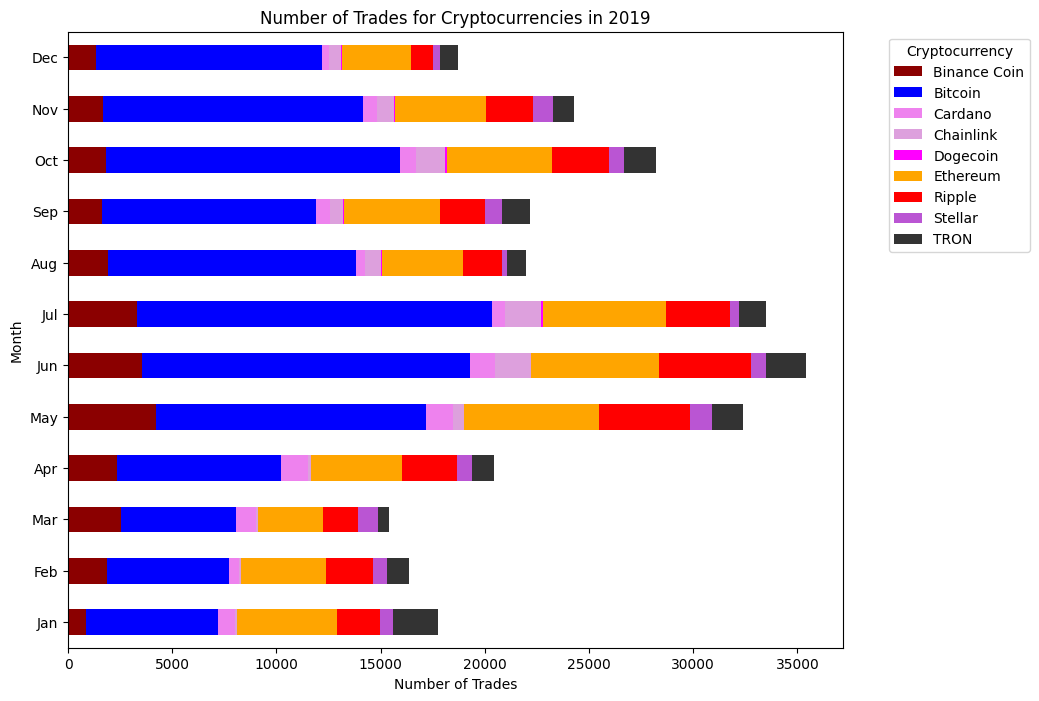

/var/folders/ts/mzxn_zz146jfqn27w1_43xz40000gn/T/ipykernel_88639/2991268588.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trade['month'] = data_trade['date_month'].dt.strftime('%b')
/var/folders/ts/mzxn_zz146jfqn27w1_43xz40000gn/T/ipykernel_88639/2991268588.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trade['month'] = pd.Categorical(data_trade['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
/var/folders/ts/mzxn

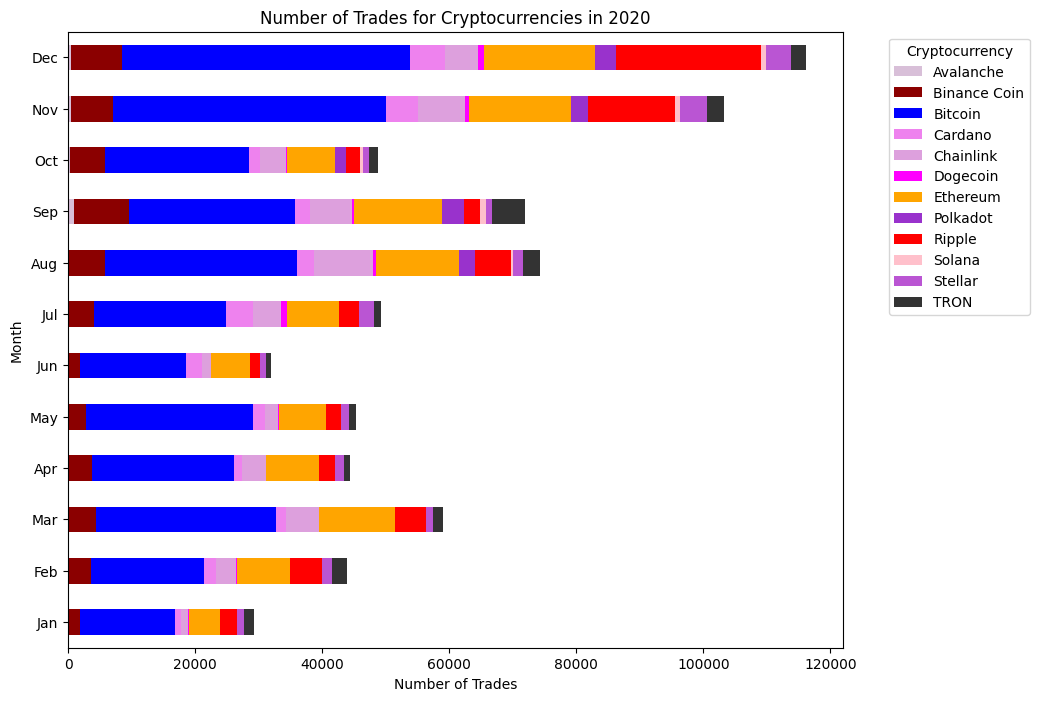

/var/folders/ts/mzxn_zz146jfqn27w1_43xz40000gn/T/ipykernel_88639/2991268588.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trade['month'] = data_trade['date_month'].dt.strftime('%b')
/var/folders/ts/mzxn_zz146jfqn27w1_43xz40000gn/T/ipykernel_88639/2991268588.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trade['month'] = pd.Categorical(data_trade['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
/var/folders/ts/mzxn

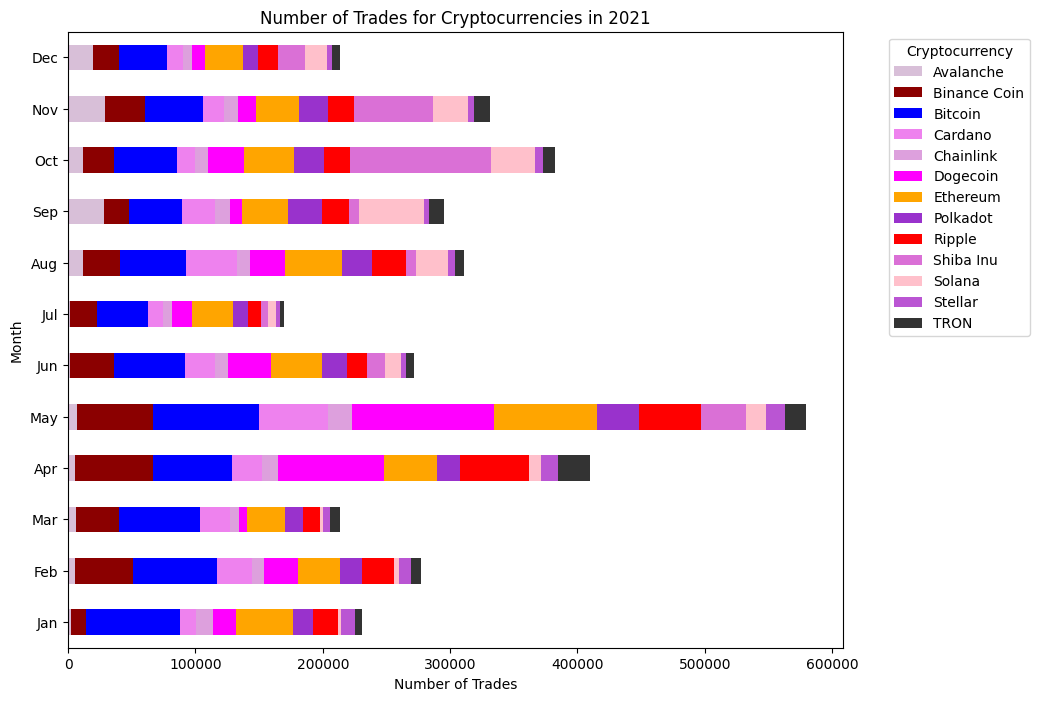

/var/folders/ts/mzxn_zz146jfqn27w1_43xz40000gn/T/ipykernel_88639/2991268588.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trade['month'] = data_trade['date_month'].dt.strftime('%b')
/var/folders/ts/mzxn_zz146jfqn27w1_43xz40000gn/T/ipykernel_88639/2991268588.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trade['month'] = pd.Categorical(data_trade['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
/var/folders/ts/mzxn

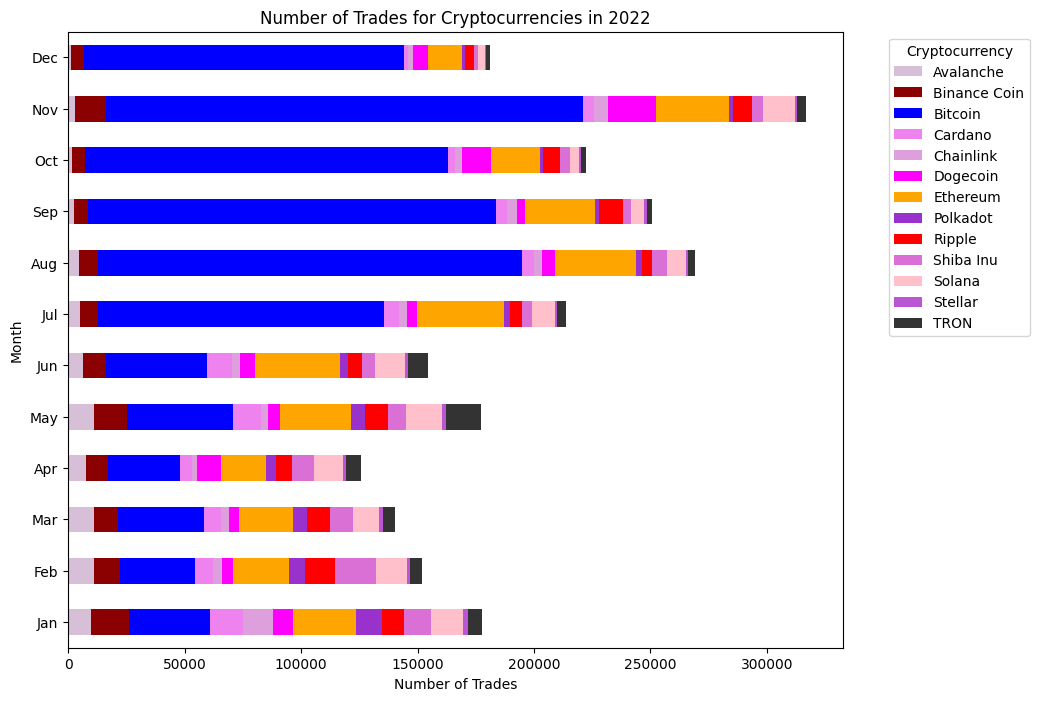

/var/folders/ts/mzxn_zz146jfqn27w1_43xz40000gn/T/ipykernel_88639/2991268588.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trade['month'] = data_trade['date_month'].dt.strftime('%b')
/var/folders/ts/mzxn_zz146jfqn27w1_43xz40000gn/T/ipykernel_88639/2991268588.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trade['month'] = pd.Categorical(data_trade['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
/var/folders/ts/mzxn

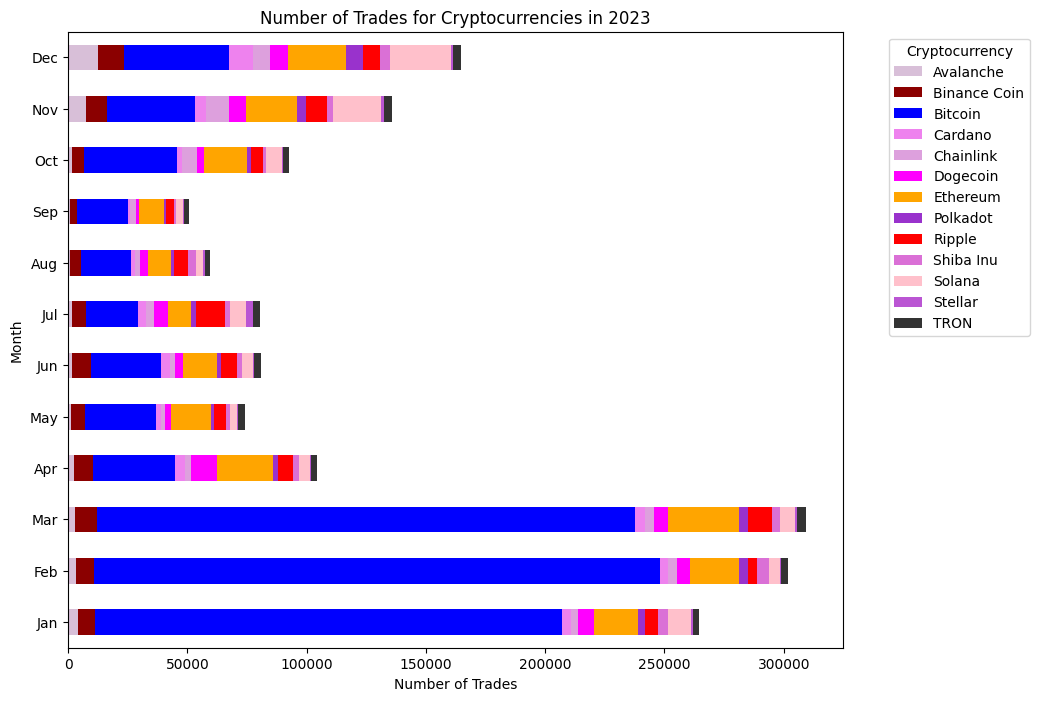

/var/folders/ts/mzxn_zz146jfqn27w1_43xz40000gn/T/ipykernel_88639/2991268588.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trade['month'] = data_trade['date_month'].dt.strftime('%b')
/var/folders/ts/mzxn_zz146jfqn27w1_43xz40000gn/T/ipykernel_88639/2991268588.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_trade['month'] = pd.Categorical(data_trade['month'], categories=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], ordered=True)
/var/folders/ts/mzxn

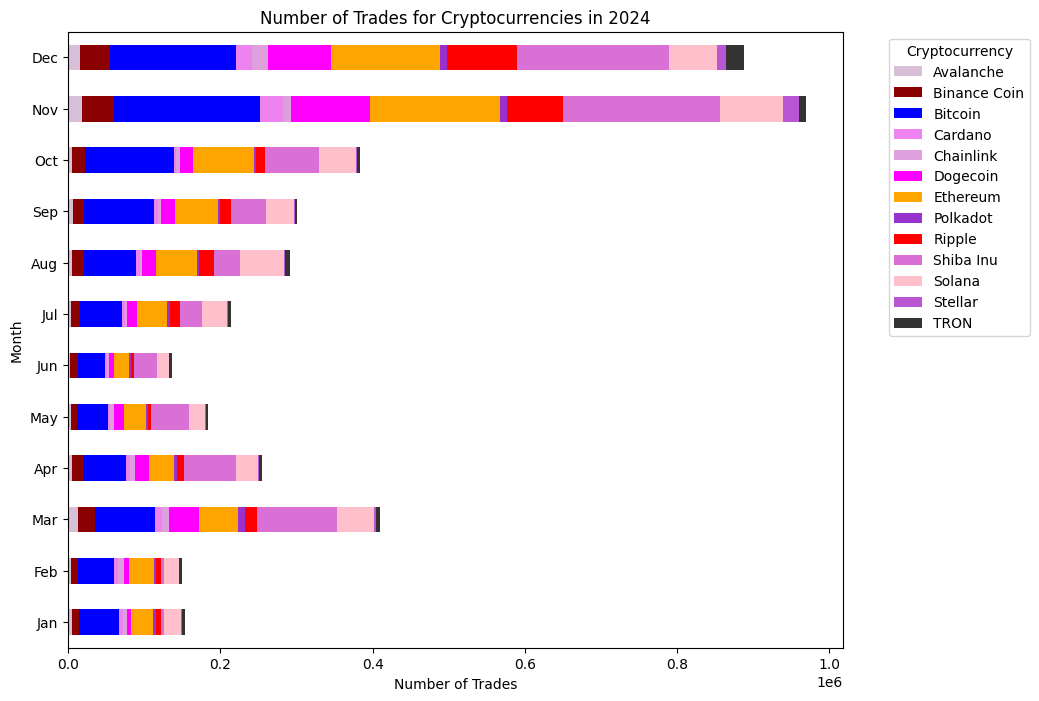

In [1360]:
# Define a color dictionary for each crypto_id
color_dict = {
    'Bitcoin': 'blue',
    'Ethereum': 'orange',
    'Ripple': 'red',
    'Binance Coin': 'darkred',
    'Solana': 'pink',
    'Dogecoin': 'magenta',
    'Cardano': 'violet',
    'Tron': 'lavender',
    'Avalanche': 'thistle',
    'Chainlink': 'plum',
    'Shiba Inu': 'orchid',
    'Stellar': 'mediumorchid',
    'Polkadot': 'darkorchid'
}

# Apply function plot_number_of_trades_for_year for each year
plot_number_of_trades_for_year(2017, data_list_df_trade)
plot_number_of_trades_for_year(2018, data_list_df_trade)
plot_number_of_trades_for_year(2019, data_list_df_trade)
plot_number_of_trades_for_year(2020, data_list_df_trade)
plot_number_of_trades_for_year(2021, data_list_df_trade)
plot_number_of_trades_for_year(2022, data_list_df_trade)
plot_number_of_trades_for_year(2023, data_list_df_trade)
plot_number_of_trades_for_year(2024, data_list_df_trade)



In [1361]:
# get the data to show difference between the highest and lowest price for each crypto_id
data_list_df_diff = data_list_df[['date_month', 'crypto_id', 'id_name', 'open', 'close']] 
data_list_df_diff.tail(50)

,date_month,crypto_id,id_name,open,close
3110,2024-09,BNB,Binance Coin,532.900000,567.400000
3111,2024-09,BTC,Bitcoin,58974.000000,63327.590000
3116,2024-09,DOGE,Dogecoin,0.101280,0.114210
3117,2024-09,DOT,Polkadot,4.259000,4.432000
3121,2024-09,ETH,Ethereum,2513.000000,2602.230000
3128,2024-09,LINK,Chainlink,11.020000,11.850000
3137,2024-09,SHIB,Shiba Inu,0.000014,0.000018
3138,2024-09,SOL,Solana,135.350000,152.490000
3143,2024-09,TRX,TRON,0.157600,0.156000
3146,2024-09,XLM,Stellar,0.092600,0.098500


In [1362]:
# Separate data by year
data_2017_diff = data_list_df_diff.loc[data_list_df_diff['date_month'].dt.year == 2017]
data_2018_diff = data_list_df_diff.loc[data_list_df_diff['date_month'].dt.year == 2018]
data_2019_diff = data_list_df_diff.loc[data_list_df_diff['date_month'].dt.year == 2019]
data_2020_diff = data_list_df_diff.loc[data_list_df_diff['date_month'].dt.year == 2020]
data_2021_diff = data_list_df_diff.loc[data_list_df_diff['date_month'].dt.year == 2021]
data_2022_diff = data_list_df_diff.loc[data_list_df_diff['date_month'].dt.year == 2022]
data_2023_diff = data_list_df_diff.loc[data_list_df_diff['date_month'].dt.year == 2023]
data_2024_diff = data_list_df_diff.loc[data_list_df_diff['date_month'].dt.year == 2024]


In [1363]:
# Getting the lowest and highest price for each crypto_id and calculating the total difference for each year
def get_grouped_data(data_diff):
    return data_diff.groupby('id_name').agg({
        'open': 'mean',
        'close': 'mean',
    }).reset_index()

data_2017_grouped = get_grouped_data(data_2017_diff)
data_2018_grouped = get_grouped_data(data_2018_diff)
data_2019_grouped = get_grouped_data(data_2019_diff)
data_2020_grouped = get_grouped_data(data_2020_diff)
data_2021_grouped = get_grouped_data(data_2021_diff)
data_2022_grouped = get_grouped_data(data_2022_diff)
data_2023_grouped = get_grouped_data(data_2023_diff)
data_2024_grouped = get_grouped_data(data_2024_diff)


# Calculte the difference between the highest and lowest price for each crypto_id for the year
data_2017_grouped['diff_y'] = data_2017_grouped['close'] - data_2017_grouped['open']
data_2018_grouped['diff_y'] = data_2018_grouped['close'] - data_2018_grouped['open']
data_2019_grouped['diff_y'] = data_2019_grouped['close'] - data_2019_grouped['open']
data_2020_grouped['diff_y'] = data_2020_grouped['close'] - data_2020_grouped['open']
data_2021_grouped['diff_y'] = data_2021_grouped['close'] - data_2021_grouped['open']
data_2022_grouped['diff_y'] = data_2022_grouped['close'] - data_2022_grouped['open']
data_2023_grouped['diff_y'] = data_2023_grouped['close'] - data_2023_grouped['open']
data_2024_grouped['diff_y'] = data_2024_grouped['close'] - data_2024_grouped['open']

# Add year to each dataframe
data_2017_grouped['year'] = 2017
data_2018_grouped['year'] = 2018
data_2019_grouped['year'] = 2019
data_2020_grouped['year'] = 2020
data_2021_grouped['year'] = 2021
data_2022_grouped['year'] = 2022
data_2023_grouped['year'] = 2023
data_2024_grouped['year'] = 2024

# Reeorder columns, year, id_name, open, close, diff_y
data_2017_grouped = data_2017_grouped[['year', 'id_name', 'open', 'close', 'diff_y']]
data_2018_grouped = data_2018_grouped[['year', 'id_name', 'open', 'close', 'diff_y']]
data_2019_grouped = data_2019_grouped[['year', 'id_name', 'open', 'close', 'diff_y']]
data_2020_grouped = data_2020_grouped[['year', 'id_name', 'open', 'close', 'diff_y']]
data_2021_grouped = data_2021_grouped[['year', 'id_name', 'open', 'close', 'diff_y']]
data_2022_grouped = data_2022_grouped[['year', 'id_name', 'open', 'close', 'diff_y']]
data_2023_grouped = data_2023_grouped[['year', 'id_name', 'open', 'close', 'diff_y']]
data_2024_grouped = data_2024_grouped[['year', 'id_name', 'open', 'close', 'diff_y']]


data_2024_grouped

,year,id_name,open,close,diff_y
0,2024,Avalanche,34.245833,34.071667,-1.741667e-01
1,2024,Binance Coin,523.303333,555.154167,3.185083e+01
2,2024,Bitcoin,63490.684167,67834.378333,4.343694e+03
3,2024,Cardano,0.517033,0.539917,2.288333e-02
4,2024,Chainlink,15.060917,15.592333,5.314167e-01
5,2024,Dogecoin,0.153592,0.172293,1.870083e-02
6,2024,Ethereum,3027.923333,3115.336667,8.741333e+01
7,2024,Polkadot,6.614417,6.504333,-1.100833e-01
8,2024,Ripple,0.674225,0.801408,1.271833e-01
9,2024,Shiba Inu,0.000018,0.000019,9.366667e-07


In [1364]:
# Get columns fiff_y in 5 decimal places
columns_to_round = ['diff_y']
data_2017_grouped[columns_to_round] = data_2017_grouped[columns_to_round].round(5)
data_2018_grouped[columns_to_round] = data_2018_grouped[columns_to_round].round(5)
data_2019_grouped[columns_to_round] = data_2019_grouped[columns_to_round].round(5)
data_2020_grouped[columns_to_round] = data_2020_grouped[columns_to_round].round(5)
data_2021_grouped[columns_to_round] = data_2021_grouped[columns_to_round].round(5)
data_2022_grouped[columns_to_round] = data_2022_grouped[columns_to_round].round(5)
data_2023_grouped[columns_to_round] = data_2023_grouped[columns_to_round].round(5)
data_2024_grouped[columns_to_round] = data_2024_grouped[columns_to_round].round(5)

# Compare the percentage change for 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024
data_grouped = [data_2017_grouped, data_2018_grouped, data_2019_grouped, data_2020_grouped,
                data_2021_grouped, data_2022_grouped, data_2023_grouped, data_2024_grouped]
data_grouped_df = pd.concat(data_grouped)

data_grouped_df.tail(50)


,year,id_name,open,close,diff_y
2,2021,Bitcoin,45543.279167,46984.698333,1441.41917
3,2021,Cardano,1.435558,1.529316,0.09376
4,2021,Chainlink,25.530075,26.218883,0.68881
5,2021,Dogecoin,0.187112,0.200902,0.01379
6,2021,Ethereum,2584.983333,2829.992500,245.00917
7,2021,Polkadot,27.492092,28.942608,1.45052
8,2021,Ripple,0.836883,0.887687,0.05080
9,2021,Shiba Inu,0.000021,0.000023,0.00000
10,2021,Solana,70.560367,84.597275,14.03691
11,2021,Stellar,0.339433,0.350959,0.01153


In [1365]:
# get in order descending, from the highest to the lowest
data_2017_grouped = data_2017_grouped.sort_values(by='diff_y', ascending=False)
data_2018_grouped = data_2018_grouped.sort_values(by='diff_y', ascending=False)
data_2019_grouped = data_2019_grouped.sort_values(by='diff_y', ascending=False)
data_2020_grouped = data_2020_grouped.sort_values(by='diff_y', ascending=False)
data_2021_grouped = data_2021_grouped.sort_values(by='diff_y', ascending=False)
data_2022_grouped = data_2022_grouped.sort_values(by='diff_y', ascending=False)
data_2023_grouped = data_2023_grouped.sort_values(by='diff_y', ascending=False)
data_2024_grouped = data_2024_grouped.sort_values(by='diff_y', ascending=False)


data_2024_grouped

,year,id_name,open,close,diff_y
2,2024,Bitcoin,63490.684167,67834.378333,4343.69417
6,2024,Ethereum,3027.923333,3115.336667,87.41333
1,2024,Binance Coin,523.303333,555.154167,31.85083
10,2024,Solana,152.640000,159.523333,6.88333
4,2024,Chainlink,15.060917,15.592333,0.53142
8,2024,Ripple,0.674225,0.801408,0.12718
3,2024,Cardano,0.517033,0.539917,0.02288
5,2024,Dogecoin,0.153592,0.172293,0.01870
11,2024,Stellar,0.143025,0.161108,0.01808
12,2024,TRON,0.137935,0.150700,0.01276


In [1366]:
# Compare the each crypto_id for each year
data_grouped_df = data_grouped_df.sort_values(by='diff_y', ascending=False)
#data_grouped_df.head(30)

# create id_name as key, the year as key, and the change as value
data_grouped_df = data_grouped_df.pivot(index='id_name', columns='year', values='diff_y')

data_grouped_df.head(30)

year,2017,2018,2019,2020,2021,2022,2023,2024
id_name,,,,,,,,
Avalanche,NaN,NaN,NaN,0.58600,8.84733,-8.21583,2.30583,-0.17417
Binance Coin,3.515,-0.20807,0.63376,1.96698,39.49833,-22.15833,5.41667,31.85083
Bitcoin,1891.372,-834.41750,291.09667,1810.69500,1441.41917,-2473.15833,2145.14917,4343.69417
Cardano,NaN,-0.02384,-0.00063,0.01238,0.09376,-0.08855,0.02899,0.02288
Chainlink,NaN,NaN,0.10172,0.78984,0.68881,-1.16192,0.78050,0.53142
Dogecoin,NaN,NaN,-0.00041,0.00022,0.01379,-0.00833,0.00161,0.01870
Ethereum,86.448,-50.24250,-0.21667,50.60750,245.00917,-206.66583,90.47917,87.41333
Polkadot,NaN,NaN,NaN,1.43464,1.45052,-1.86675,0.32433,-0.11008
Ripple,NaN,-0.01897,-0.01298,0.00226,0.05080,-0.04088,0.02304,0.12718


In [1367]:
# Drop years 2017, 2018, 2019 because they have no all the data
data_grouped_df = data_grouped_df.drop([2017, 2018, 2019], axis=1)
data_grouped_df.head(30)


year,2020,2021,2022,2023,2024
id_name,,,,,
Avalanche,0.58600,8.84733,-8.21583,2.30583,-0.17417
Binance Coin,1.96698,39.49833,-22.15833,5.41667,31.85083
Bitcoin,1810.69500,1441.41917,-2473.15833,2145.14917,4343.69417
Cardano,0.01238,0.09376,-0.08855,0.02899,0.02288
Chainlink,0.78984,0.68881,-1.16192,0.78050,0.53142
Dogecoin,0.00022,0.01379,-0.00833,0.00161,0.01870
Ethereum,50.60750,245.00917,-206.66583,90.47917,87.41333
Polkadot,1.43464,1.45052,-1.86675,0.32433,-0.11008
Ripple,0.00226,0.05080,-0.04088,0.02304,0.12718


In [1368]:
# getting the percentage from 2020 (beacuse we have all of them, except Shiba INU) to 2024, calculate the ended total change for each crypto_id
data_grouped_df['change_2020_to_2024'] = data_grouped_df[2020] + data_grouped_df[2021] + \
    data_grouped_df[2022] + data_grouped_df[2023] + data_grouped_df[2024]

# Sort the values in descending order, so we can see the id the keep thorugh the years the best percentage change positive
data_grouped_df = data_grouped_df.sort_values(by='change_2020_to_2024', ascending=False)

data_grouped_df

## So acording to this comparison in change_2020_to_2024, the list of crypto_id that have the highest positive percentage change are:
# Bitcoin, Ehtereum, Binance Coin, Solana, Avalanche
# They kept from 2020 to 2024 a positive percentage change, comparing it over the years
# Because now we know the best performing crypto_id, we goint to analyze the top 5 crypto_id in more detail



year,2020,2021,2022,2023,2024,change_2020_to_2024
id_name,,,,,,
Bitcoin,1810.69500,1441.41917,-2473.15833,2145.14917,4343.69417,7267.79918
Ethereum,50.60750,245.00917,-206.66583,90.47917,87.41333,266.84334
Binance Coin,1.96698,39.49833,-22.15833,5.41667,31.85083,56.57448
Solana,-0.26848,14.03691,-13.33917,7.64750,6.88333,14.96009
Avalanche,0.58600,8.84733,-8.21583,2.30583,-0.17417,3.34916
Chainlink,0.78984,0.68881,-1.16192,0.78050,0.53142,1.62865
Polkadot,1.43464,1.45052,-1.86675,0.32433,-0.11008,1.23266
Ripple,0.00226,0.05080,-0.04088,0.02304,0.12718,0.16240
Cardano,0.01238,0.09376,-0.08855,0.02899,0.02288,0.06946


In [1372]:
# create a copy of the data_grouped_df to rename the columns
data_grouped_df_copy = data_grouped_df.copy()

# Add column 'Rank' to show the rank of the crypto_id
data_grouped_df_copy['Rank'] = range(1, len(data_grouped_df_copy) + 1)

# Rename the columns to be able to use them in the next function
data_grouped_df_copy.columns = ['2020', '2021', '2022', '2023', '2024', 'change_2020_to_2024', 'Rank']

# rename the column change_2020_to_2024 to 'Change 2020 to 2024'
data_grouped_df_copy = data_grouped_df_copy.rename(columns={'change_2020_to_2024': 'Change 2020 to 2024'})

# Rename index 'id_name' to 'Crypto ID'
data_grouped_df_copy.index.name = 'Crypto ID'

# separate the amounts by comma
data_grouped_df_copy['2020'] = data_grouped_df_copy['2020'].apply(lambda x: "{:,.5f}".format(x))
data_grouped_df_copy['2021'] = data_grouped_df_copy['2021'].apply(lambda x: "{:,.5f}".format(x))
data_grouped_df_copy['2022'] = data_grouped_df_copy['2022'].apply(lambda x: "{:,.5f}".format(x))
data_grouped_df_copy['2023'] = data_grouped_df_copy['2023'].apply(lambda x: "{:,.5f}".format(x))
data_grouped_df_copy['2024'] = data_grouped_df_copy['2024'].apply(lambda x: "{:,.5f}".format(x))
data_grouped_df_copy['Change 2020 to 2024'] = data_grouped_df_copy['Change 2020 to 2024'].apply(lambda x: "{:,.5f}".format(x))

# Reorder the columns
data_grouped_df_copy = data_grouped_df_copy[['Rank', '2020', '2021', '2022', '2023', '2024', 'Change 2020 to 2024']]
data_grouped_df_copy



,Rank,2020,2021,2022,2023,2024,Change 2020 to 2024
Crypto ID,,,,,,,
Bitcoin,1,"1,810.69500","1,441.41917","-2,473.15833","2,145.14917","4,343.69417","7,267.79918"
Ethereum,2,50.60750,245.00917,-206.66583,90.47917,87.41333,266.84334
Binance Coin,3,1.96698,39.49833,-22.15833,5.41667,31.85083,56.57448
Solana,4,-0.26848,14.03691,-13.33917,7.64750,6.88333,14.96009
Avalanche,5,0.58600,8.84733,-8.21583,2.30583,-0.17417,3.34916
Chainlink,6,0.78984,0.68881,-1.16192,0.78050,0.53142,1.62865
Polkadot,7,1.43464,1.45052,-1.86675,0.32433,-0.11008,1.23266
Ripple,8,0.00226,0.05080,-0.04088,0.02304,0.12718,0.16240
Cardano,9,0.01238,0.09376,-0.08855,0.02899,0.02288,0.06946


In [1336]:
# Now that we know the top 5 performers lets get the info in them, showing it in graphs
data_Bitcoin = data_list_df.loc[data_list_df['crypto_id'] == 'BTC']
data_Ethereum = data_list_df.loc[data_list_df['crypto_id'] == 'ETH']
data_Binance_Coin = data_list_df.loc[data_list_df['crypto_id'] == 'BNB']
data_Solana = data_list_df.loc[data_list_df['crypto_id'] == 'SOL']
data_Avalanche = data_list_df.loc[data_list_df['crypto_id'] == 'AVAX']

# Group top_5_performers
data_top_5_performers = [data_Bitcoin, data_Ethereum, data_Binance_Coin, data_Solana, data_Avalanche]
data_top_5_performers_df = pd.concat(data_top_5_performers)

# Drop rows where 'date_month' is in 2017, 2018, 2019
data_top_5_performers_df = data_top_5_performers_df[~data_top_5_performers_df['date_month'].dt.year.isin([2017, 2018, 2019])]

data_top_5_performers_df



,date_month,crypto_id,id_name,open,close,diff_oc,mean_oc,high,low,diff_hl,mean_hl,volume,number_of_trades
470,2020-01,BTC,Bitcoin,7195.24,9352.89,2157.65,8274.065,9578.00,6871.04,2706.96,8224.520,1.691323e+06,14894658
503,2020-02,BTC,Bitcoin,9351.71,8523.61,-828.10,8937.660,10500.00,8445.00,2055.00,9472.500,1.609726e+06,17837429
536,2020-03,BTC,Bitcoin,8523.61,6410.44,-2113.17,7467.025,9188.00,3782.13,5405.87,6485.065,3.789769e+06,28381746
569,2020-04,BTC,Bitcoin,6412.14,8620.00,2207.86,7516.070,9460.00,6150.11,3309.89,7805.055,2.528374e+06,22386100
602,2020-05,BTC,Bitcoin,8620.00,9448.27,828.27,9034.135,10067.00,8117.00,1950.00,9092.000,2.685340e+06,26310658
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3059,2024-08,AVAX,Avalanche,25.70,22.81,-2.89,24.255,28.00,17.29,10.71,22.645,6.469939e+07,5186255
3107,2024-09,AVAX,Avalanche,22.80,27.71,4.91,25.255,30.85,20.48,10.37,25.665,5.346057e+07,5804609
3155,2024-10,AVAX,Avalanche,27.71,25.03,-2.68,26.370,29.87,23.90,5.97,26.885,4.909244e+07,5320824
3202,2024-11,AVAX,Avalanche,25.03,44.81,19.78,34.920,47.93,22.35,25.58,35.140,1.320305e+08,17580662


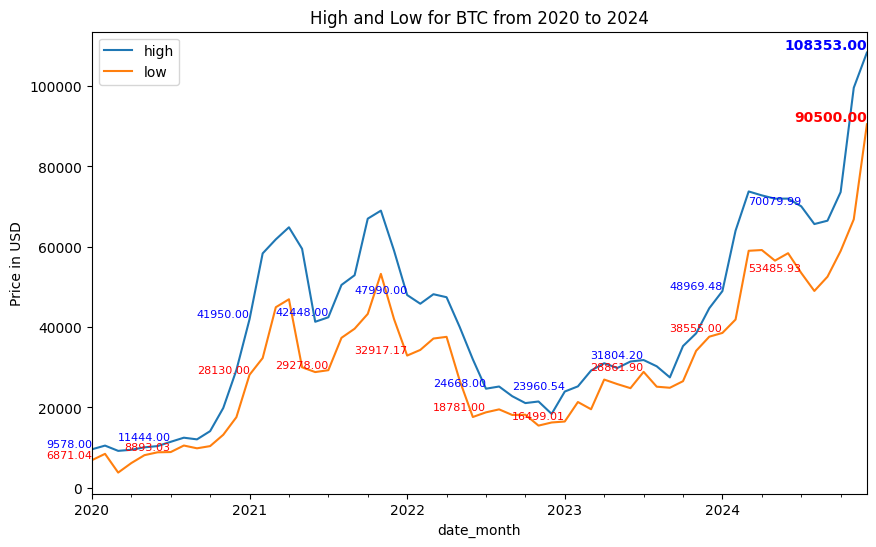

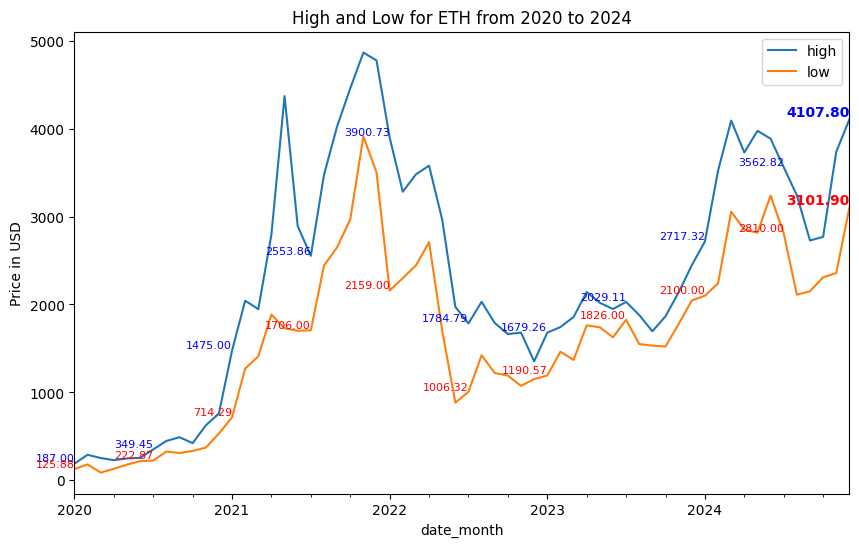

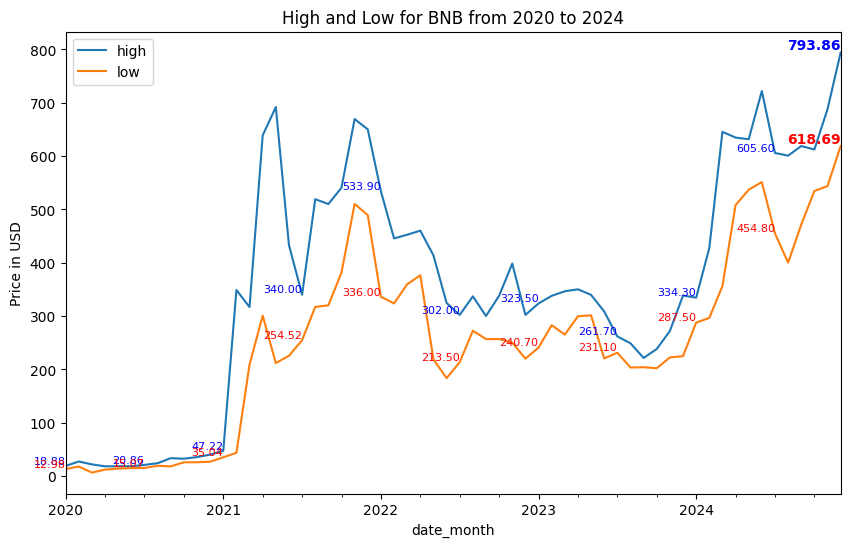

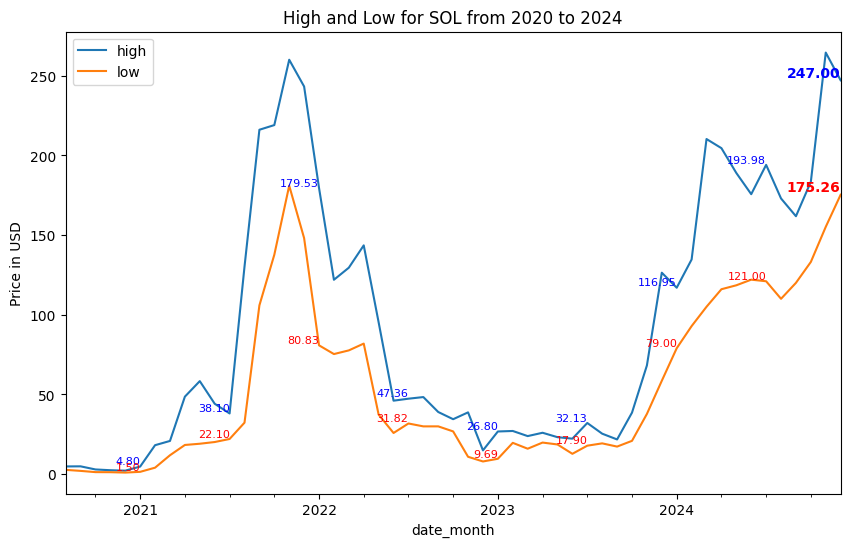

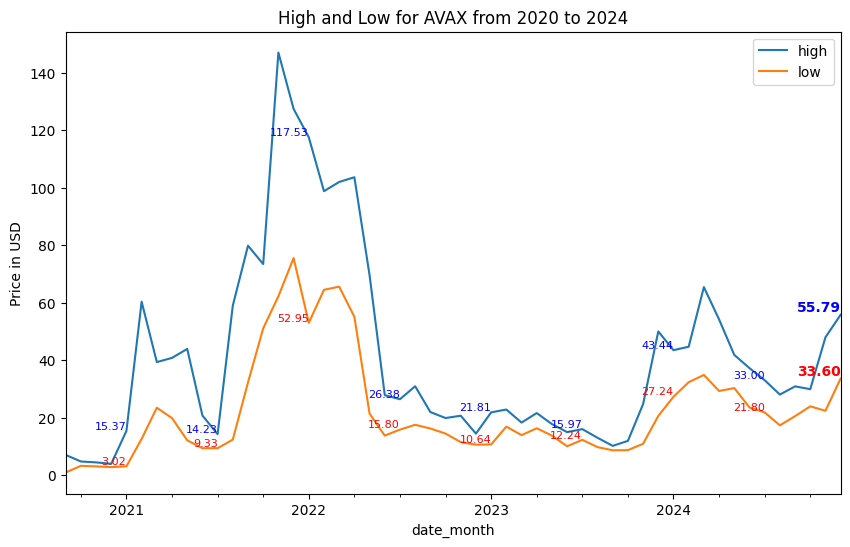

In [1337]:
# From the top_5_performers_df get the 'open', 'close' for each crypto_id
crypto_ids = ['BTC', 'ETH', 'BNB', 'SOL', 'AVAX']
crypto_data = {}

for crypto_id in crypto_ids:
    crypto_data[crypto_id] = data_top_5_performers_df.loc[data_top_5_performers_df['crypto_id'] ==\
                                                           crypto_id, ['date_month', 'high', 'low']].set_index('date_month')

# lets plot the open and close for each crypto_id
for crypto_id, df in crypto_data.items():
    df.plot(figsize=(10, 6))
    plt.title(f'High and Low for {crypto_id} from 2020 to 2024')
    plt.ylabel('Price in USD')

    # Add value labels to the graph only at the January lines and July lines
    for date, high_val, low_val in zip(df.index, df['high'], df['low']):
        if date.month == 1 or date.month == 7:  # Check if the month is January or July
            plt.text(date.to_timestamp(), high_val, f'{high_val:.2f}', ha='right', va='bottom', fontsize=8, color='blue')
            plt.text(date.to_timestamp(), low_val, f'{low_val:.2f}', ha='right', va='bottom', fontsize=8, color='red')

    # Add value label for the last amount in 2024
    last_date = df.index[-1].to_timestamp()
    last_high_val = df['high'].iloc[-1]
    last_low_val = df['low'].iloc[-1]
    plt.text(last_date, last_high_val, f'{last_high_val:.2f}', ha='right', va='bottom', fontsize=10, color='blue', fontweight='bold')
    plt.text(last_date, last_low_val, f'{last_low_val:.2f}', ha='right', va='bottom', fontsize=10, color='red', fontweight='bold')

    plt.show()

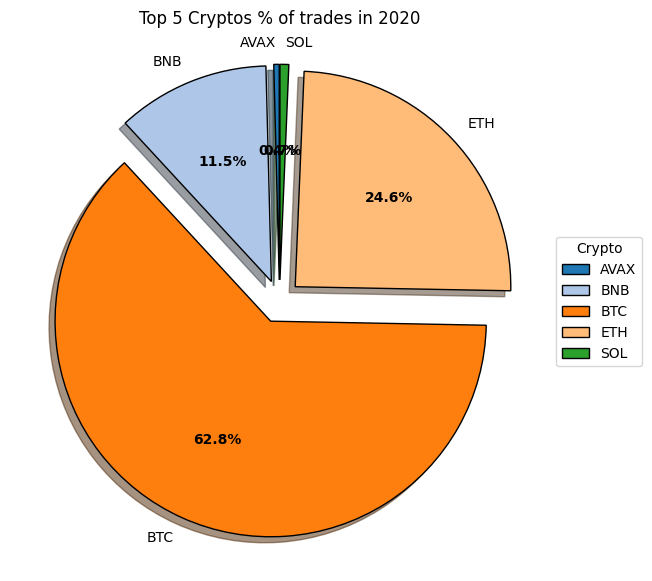

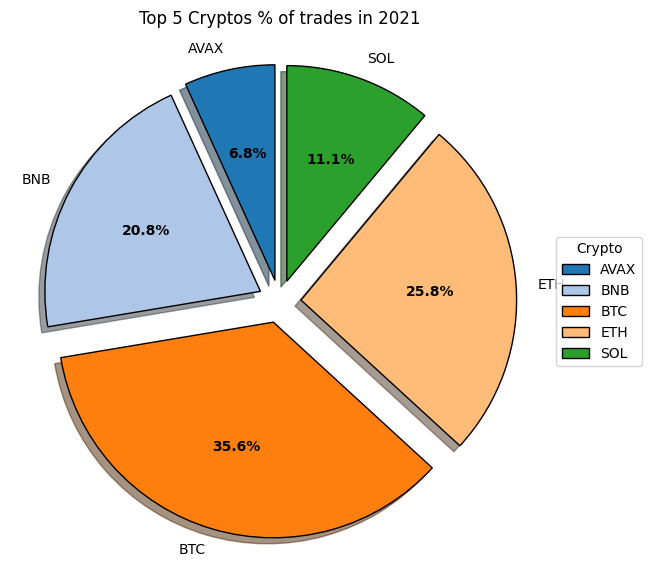

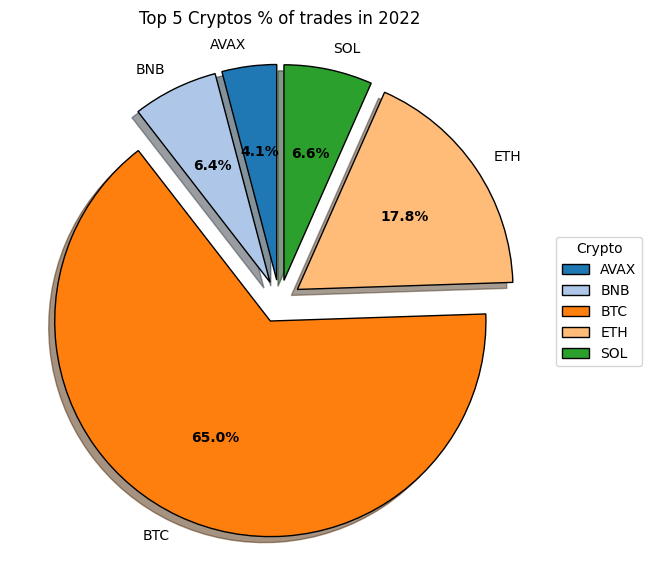

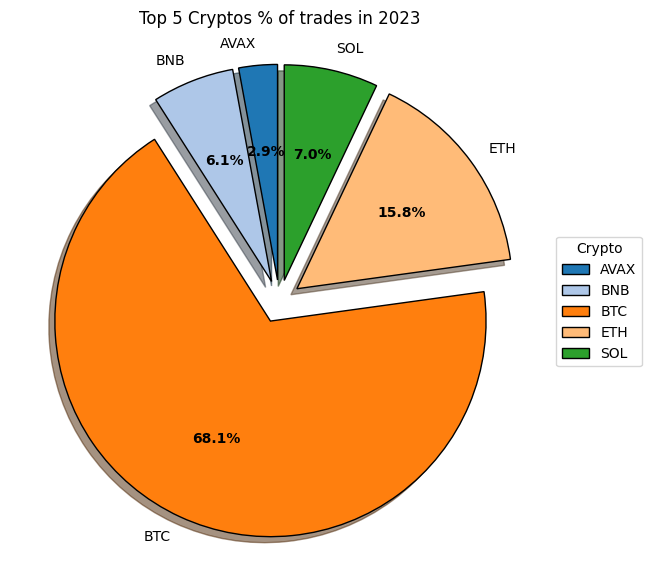

In [ ]:
# Define the variables
years = dt_top_5_df.columns[:-1]  # Exclude the 'total_trades' column
cryptos = dt_top_5_df.index
colors = plt.cm.tab20.colors
explode = [0.1] * len(cryptos)
wp = {'linewidth': 1, 'edgecolor': "black"}

# Function to format the percentage labels
def func(pct, allvals):
    return "{:.1f}%".format(pct)

# Loop through each year and create a pie chart
for year in years:
    data = dt_top_5_df[year]
    
    # Creating plot
    fig, ax = plt.subplots(figsize=(10, 7))
    wedges, texts, autotexts = ax.pie(data,
                      autopct=lambda pct: func(pct, data),
                      explode=explode,
                      labels=cryptos,
                      shadow=True,
                      colors=colors,
                      startangle=90,
                      wedgeprops=wp,
                      textprops=dict(color="black"))

    # Adding legend
    ax.legend(wedges, cryptos,
          title="Crypto",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    ax.set_title(f"Top 5 Cryptos % of trades in {year}")

    # Show plot
    plt.show()

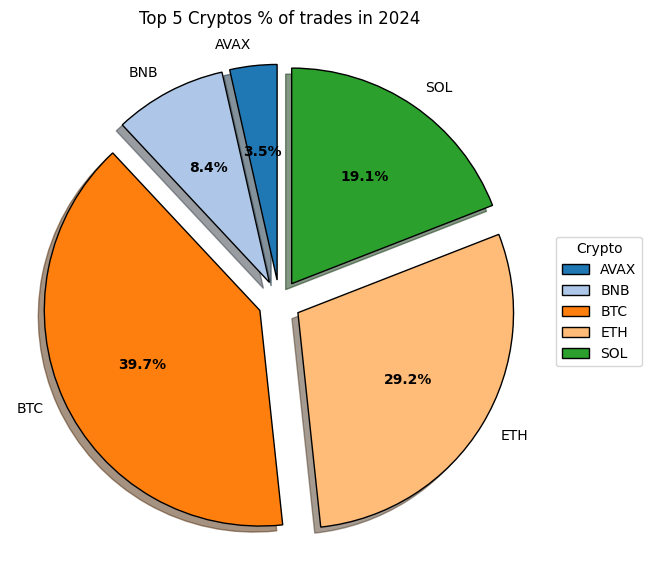

In [ ]:
# Get the data for 2024
data_2024 = dt_top_5_df[2024]

# Define the variables
cryptos = dt_top_5_df.index
colors = plt.cm.tab20.colors
explode = [0.1] * len(cryptos)
wp = {'linewidth': 1, 'edgecolor': "black"}

# Function to format the percentage labels
def func(pct, allvals):
    return "{:.1f}%".format(pct)

# Creating plot
fig, ax = plt.subplots(figsize=(10, 7))
wedges, texts, autotexts = ax.pie(data_2024,
                  autopct=lambda pct: func(pct, data_2024),
                  explode=explode,
                  labels=cryptos,
                  shadow=True,
                  colors=colors,
                  startangle=90,
                  wedgeprops=wp,
                  textprops=dict(color="black"))

# Adding legend
ax.legend(wedges, cryptos,
      title="Crypto",
      loc="center left",
      bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=10, weight="bold")
ax.set_title("Top 5 Cryptos % of trades in 2024")

# Show plot
plt.show()


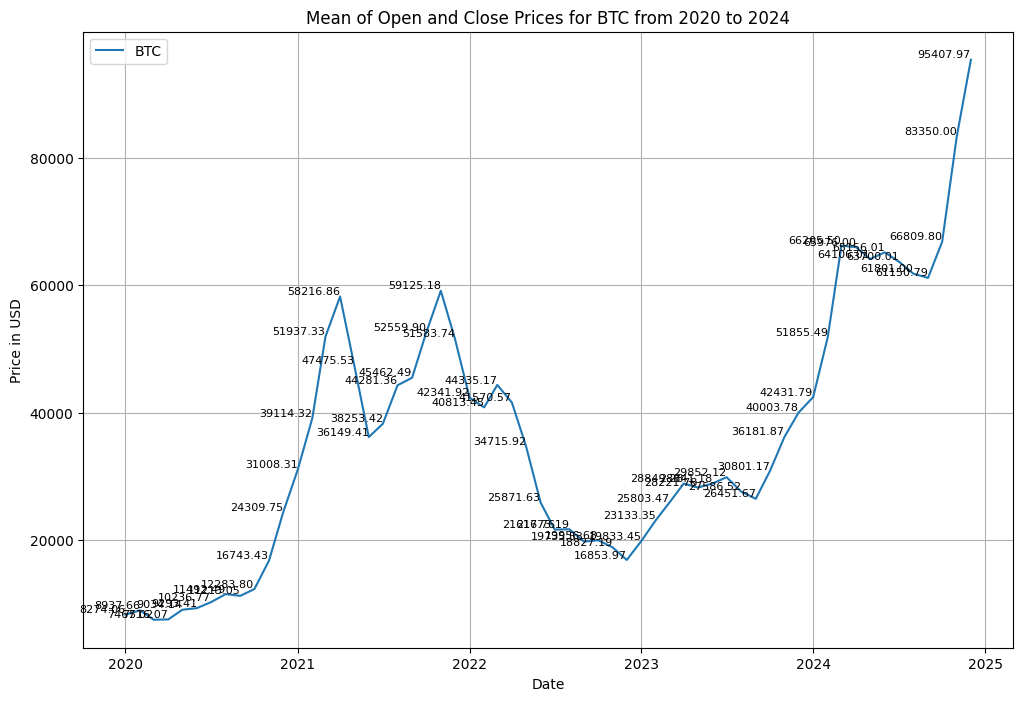

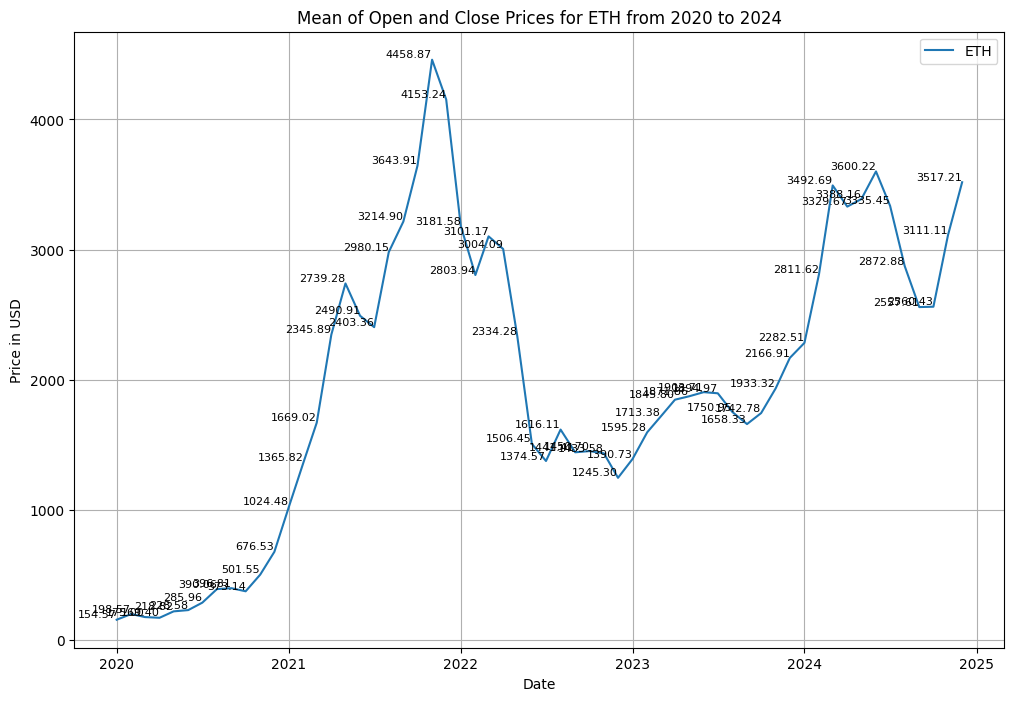

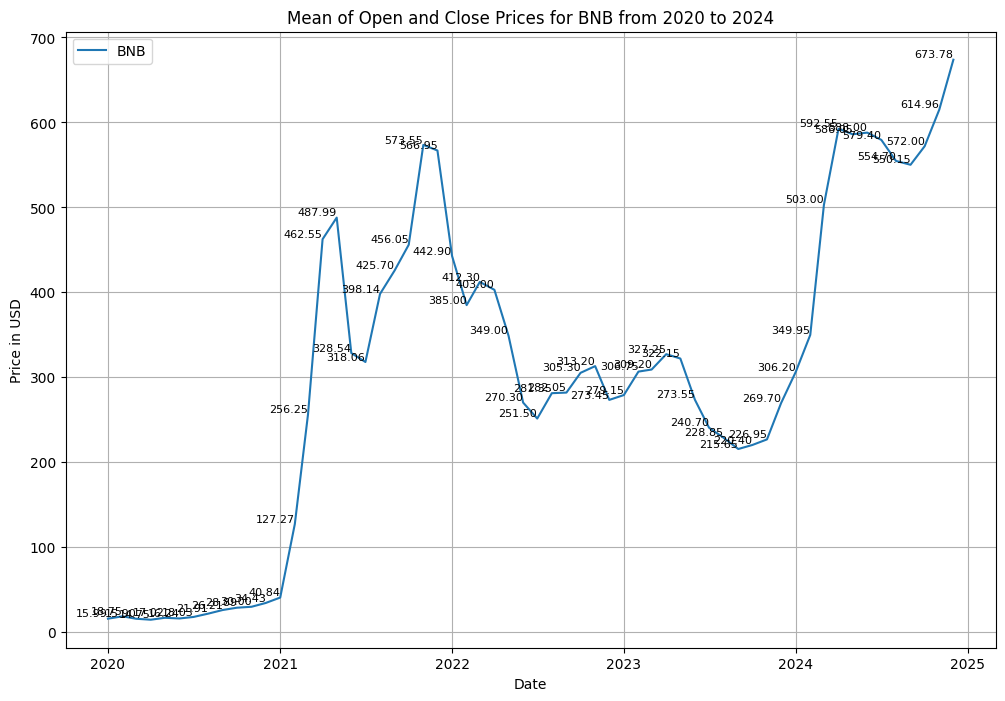

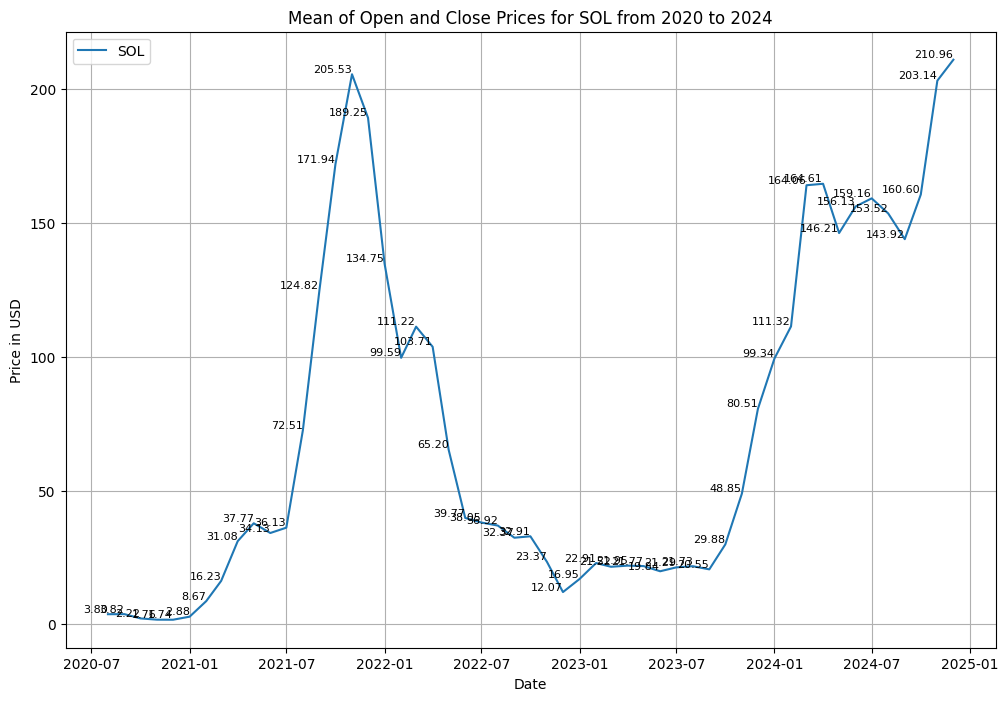

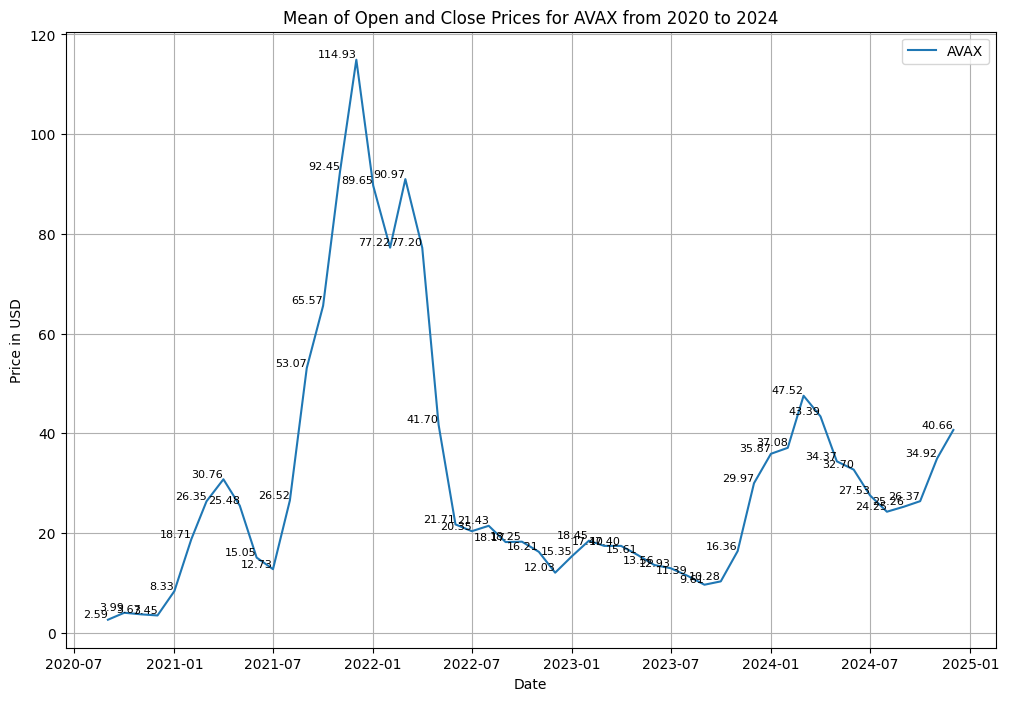

In [1340]:
# From data_top_5_performers_df get the 'open', 'close' for each crypto_id and calculate the mean
crypto_ids = ['BTC', 'ETH', 'BNB', 'SOL', 'AVAX']
crypto_data = {}

for crypto_id in crypto_ids:
    crypto_data[crypto_id] = data_top_5_performers_df.loc[data_top_5_performers_df['crypto_id'] == crypto_id, ['date_month', 'open', 'close']].set_index('date_month')
    # Calculate the mean for each crypto_id
    crypto_data[crypto_id]['mean'] = crypto_data[crypto_id].mean(axis=1)

# Plot the mean for each crypto_id in separate graphs
for crypto_id, df in crypto_data.items():
    plt.figure(figsize=(12, 8))
    plt.plot(df.index.to_timestamp(), df['mean'], label=crypto_id)
    plt.title(f'Mean of Open and Close Prices for {crypto_id} from 2020 to 2024')
    plt.ylabel('Price in USD')
    plt.xlabel('Date')
    plt.legend()
    plt.grid(True)
    
    # Add value labels to the graph
    for date, mean_val in zip(df.index, df['mean']):
        plt.text(date.to_timestamp(), mean_val, f'{mean_val:.2f}', ha='right', va='bottom', fontsize=8)
    
    plt.show()



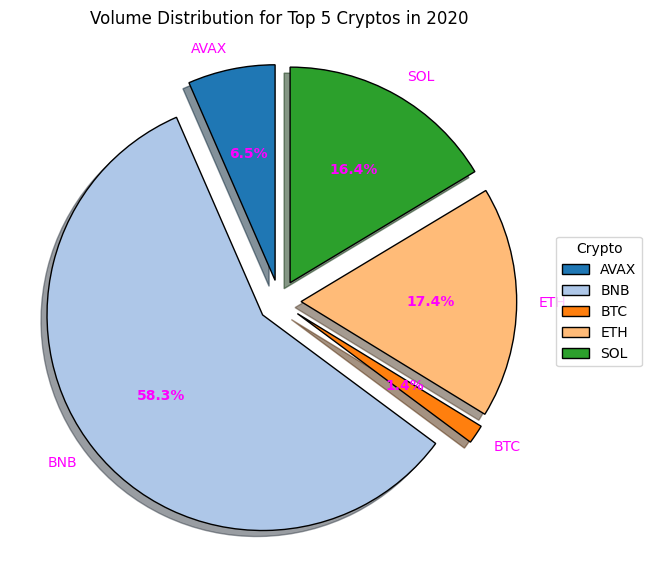

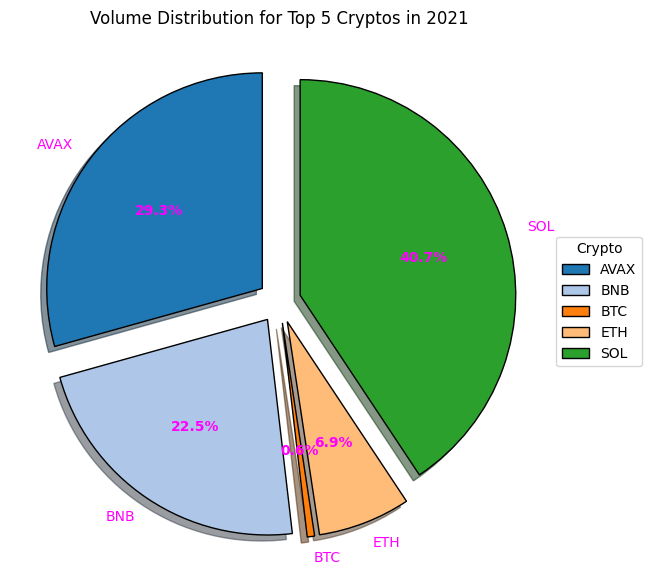

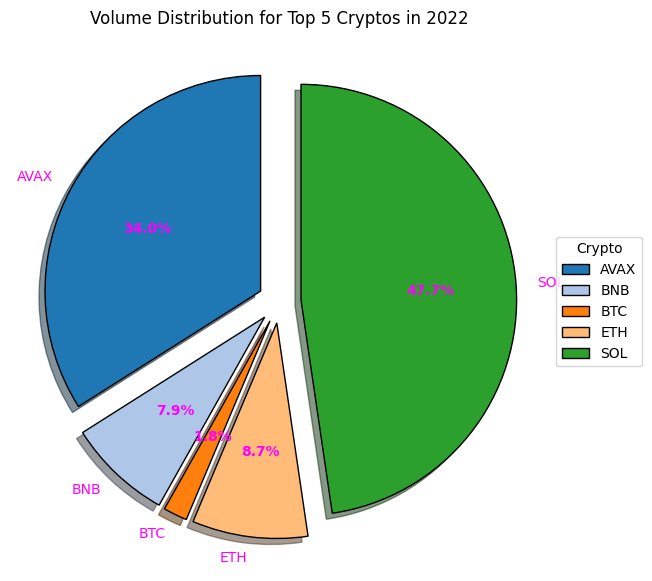

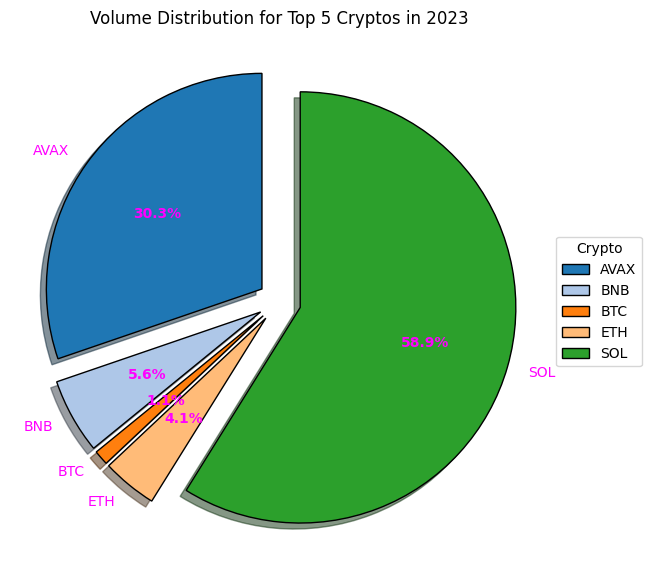

In [ ]:
# Ensure 'date_month' is in datetime format
data_top_5_performers_df['date_month'] = pd.to_datetime(data_top_5_performers_df['date_month'].astype(str))

# Extract the year from 'date_month'
data_top_5_performers_df['year'] = data_top_5_performers_df['date_month'].dt.year

# Group by year and sum the volumes
volume_distribution_by_year = data_top_5_performers_df.groupby('year')['volume'].sum()

# Function to format the percentage labels
def func(pct, allvals):
    return "{:.1f}%".format(pct)

# Loop through each year and create a pie chart
for year in years:
    data = data_top_5_performers_df[data_top_5_performers_df['year'] == year].groupby('crypto_id')['volume'].sum()
    
    # Creating plot
    fig, ax = plt.subplots(figsize=(10, 7))
    wedges, texts, autotexts = ax.pie(data,
                      autopct=lambda pct: func(pct, data),
                      explode=explode,
                      labels=data.index,
                      shadow=True,
                      colors=colors,
                      startangle=90,
                      wedgeprops=wp,
                      textprops=dict(color="magenta"))

    # Adding legend
    ax.legend(wedges, data.index,
          title="Crypto",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

    plt.setp(autotexts, size=10, weight="bold")
    ax.set_title(f"Volume Distribution for Top 5 Cryptos in {year}")

    # Show plot
    plt.show()




In [1343]:
data_df_copy = data_df.copy()
#drop year 2017, 2018, 2019
data_df_copy = data_df_copy[~data_df_copy['date_month'].dt.year.isin([2017, 2018, 2019])]

# Just column 'date_month', 'crypto_id', 'id_name', 'volume'
data_df_copy = data_df_copy[['date_month', 'crypto_id', 'id_name', 'volume']]
data_df_copy.head()

# Group by 'date_month', 'crypto_id', 'id_name' and sum the 'volume'
data_df_copy = data_df_copy.groupby(['date_month', 'crypto_id', 'id_name']).sum().reset_index()
data_df_copy.head()





,date_month,crypto_id,id_name,volume
0,2020-01,ADA,Cardano,6.783478e+09
1,2020-01,ALGO,Algorand,1.407962e+08
2,2020-01,ATOM,Cosmos,3.032754e+07
3,2020-01,BAT,Basic Attention Token,2.065194e+08
4,2020-01,BCH,Bitcoin Cash,6.736275e+06


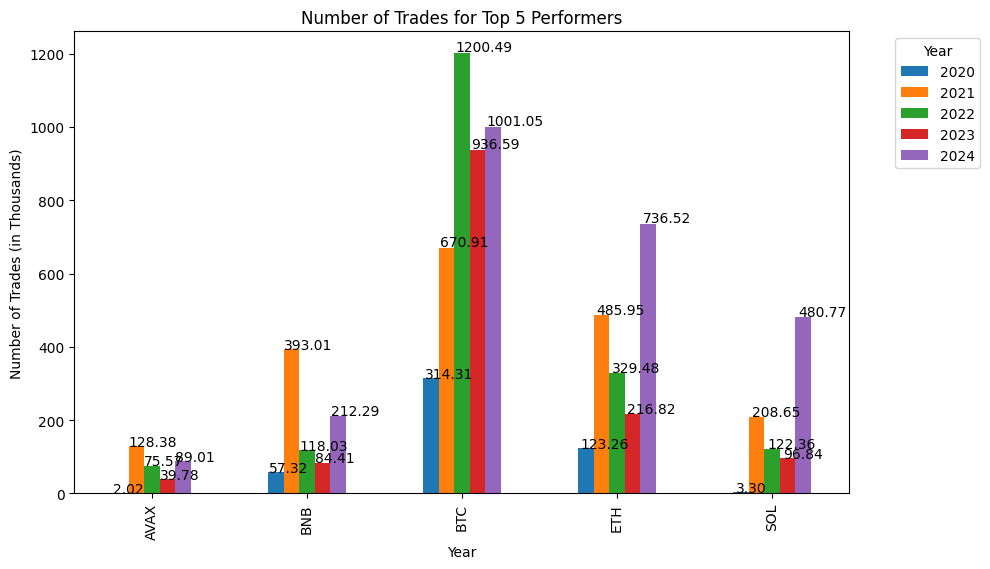

In [1373]:
# Rename data_top_5_performers_df to dt_top_5_df
dt_top_5_df = data_top_5_performers_df

# Get the sum of 'number_of_trades' for each year
dt_top_5_df['year'] = dt_top_5_df['date_month'].dt.year
dt_top_5_df['number_of_trades'] = dt_top_5_df['number_of_trades'] / 1000
dt_top_5_df = dt_top_5_df.groupby(['crypto_id', 'year'])['number_of_trades'].sum().unstack().fillna(0)

# Plot a bar chart for the number of trades for each year
ax = dt_top_5_df.plot(kind='bar', figsize=(10, 6))
plt.title('Number of Trades for Top 5 Performers')
plt.xlabel('Year')
plt.ylabel('Number of Trades (in Thousands)')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add value labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()



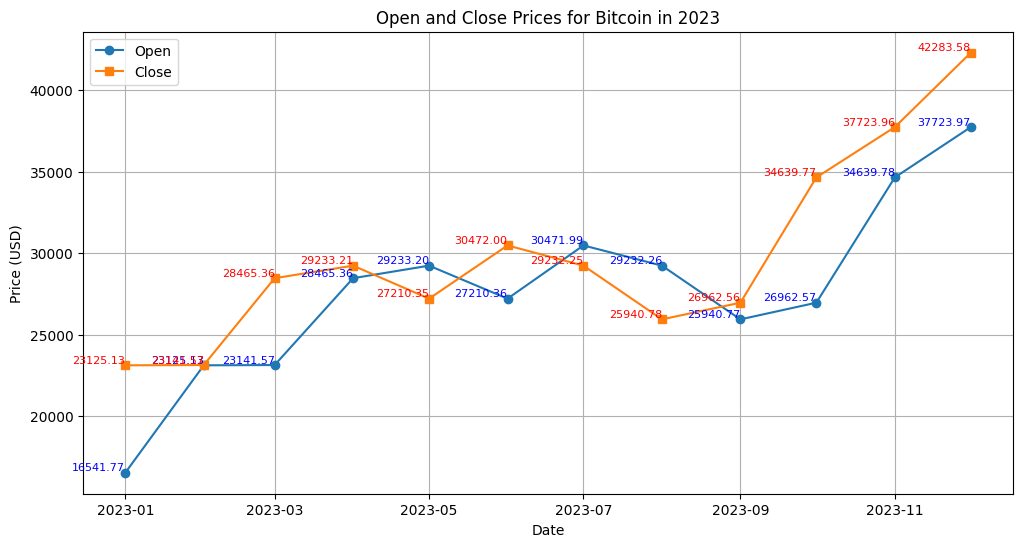

In [1345]:
btc_oc = data_2023[data_2023['crypto_id'] == 'BTC']
open_BTC = btc_oc['open'].values
close_BTC = btc_oc['close'].values

# Define x_axis using the date_month column from data_2023 and convert to datetime
x_axis = btc_oc['date_month'].dt.to_timestamp().values

# Create a graph for open and close for BTC in 2023
plt.figure(figsize=(12, 6))
plt.plot(x_axis, open_BTC, label='Open', marker='o')
plt.plot(x_axis, close_BTC, label='Close', marker='s')
plt.title('Open and Close Prices for Bitcoin in 2023')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Add value labels to the graph
for i, (open_val, close_val) in enumerate(zip(open_BTC, close_BTC)):
    plt.text(x_axis[i], open_val, f'{open_val:.2f}', ha='right', va='bottom', fontsize=8, color='blue')
    plt.text(x_axis[i], close_val, f'{close_val:.2f}', ha='right', va='bottom', fontsize=8, color='red')

plt.show()




In [ ]:
def plot_open_close_prices(data, crypto_id, year):
    crypto_data = data[data['crypto_id'] == crypto_id]
    open_prices = crypto_data['open'].values
    close_prices = crypto_data['close'].values
    x_axis = crypto_data['date_month'].dt.to_timestamp().values

    plt.figure(figsize=(12, 6))
    plt.plot(x_axis, open_prices, label='Open', marker='o')
    plt.plot(x_axis, close_prices, label='Close', marker='s')
    plt.title(f'Open and Close Prices for {crypto_id} in {year}')
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)

    for i, (open_val, close_val) in enumerate(zip(open_prices, close_prices)):
        plt.text(x_axis[i], open_val, f'{open_val:.2f}', ha='right', va='bottom', fontsize=8, color='blue')
        plt.text(x_axis[i], close_val, f'{close_val:.2f}', ha='right', va='bottom', fontsize=8, color='red')

    plt.show()

plot_open_close_prices(data_2024, 'BTC', 2024)

KeyError: 'crypto_id'

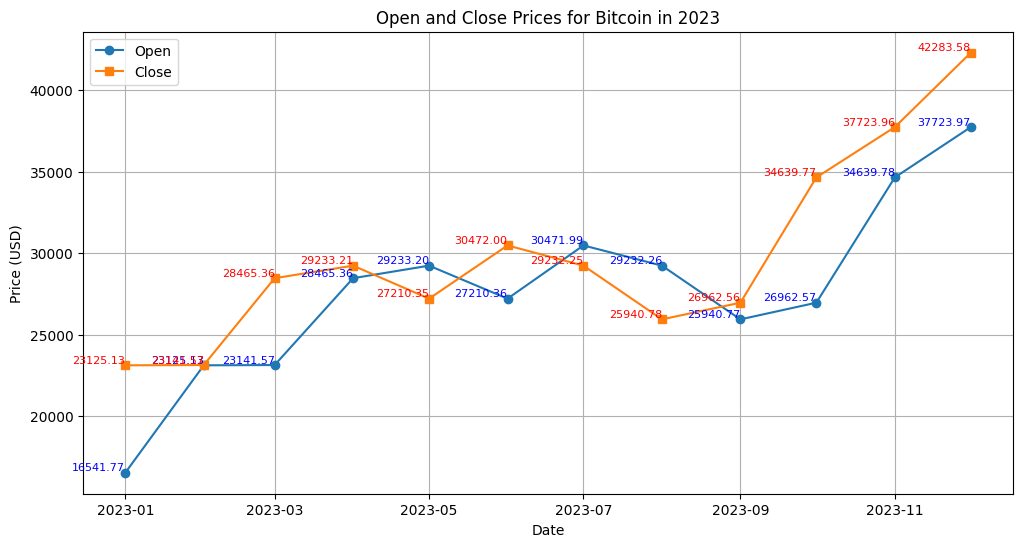

In [905]:
# Define x_axis using the date_month column from data_2023 and convert to datetime
x_axis = btc_oc['date_month'].dt.to_timestamp().values

# Create a graph for open and close for BTC in 2023
plt.figure(figsize=(12, 6))
plt.plot(x_axis, open_BTC, label='Open', marker='o')
plt.plot(x_axis, close_BTC, label='Close', marker='s')
plt.title('Open and Close Prices for Bitcoin in 2023')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)

# Add value labels to the graph
for i, (open_val, close_val) in enumerate(zip(open_BTC, close_BTC)):
    plt.text(x_axis[i], open_val, f'{open_val:.2f}', ha='right', va='bottom', fontsize=8, color='blue')
    plt.text(x_axis[i], close_val, f'{close_val:.2f}', ha='right', va='bottom', fontsize=8, color='red')

plt.show()